In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
var_names={'vcat' : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
           'vname': ['ndre t-1', 'ndre t-2', 'ndre t-3', 't2m', 't2m t-1', 't2m t-2', 't2m t-3', 'tp', 'tp t-1', 'tp t-2', 'tp t-3', 'swvl1', 'swvl1 t-1', 'swvl1 t-2', 'swvl1 t-3', 'swvl2', 'swvl2 t-1', 'swvl2 t-2', 'swvl2 t-3', 'swvl3', 'swvl3 t-1', 'swvl3 t-2', 'swvl3 t-3', 'swvl4', 'swvl4 t-1', 'swvl4 t-2', 'swvl4 t-3', 'vpd', 'vpd t-1', 'vpd t-2', 'vpd t-3', 'ssrd', 'ssrd t-1', 'ssrd t-2', 'ssrd t-3'],
#           'rcat' : [0, 4, 8, 12, 16, 20, 24, 28, 29, 30, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27]
          }
lc_class={'lcat': ['20', '30', '40', '50', '60', '70', '80', '90', '100', '111', '112', '113', '114', '115', '116', '121', '122', '123', '124', '125', '126', '200'],
          'lname' : ['Shrubs', 'Herbaceous vegetation', 'Cropland', 'Urban', 'Bare/Sparse Veg', 'Snow and Ice', 'Perm. Water. bodies', 'Herb. Wet.', 'Moss and Lichen', 'Closed Forest EN', 'Closed Forest EB', 'Closed Forest DN', 'Closed Forest DB', 'Closed Forest Mixed', 'Closed Forest unknown', 'Open Forest EN', 'Open Forest EB', 'Open Forest DN', 'Open Forest DB', 'Open Forest Mixed', 'Open Forest unknown', 'Open Sea']
         }
var_df = pd.DataFrame(var_names)
lc_df = pd.DataFrame(lc_class)


In [3]:
var_df[var_df.vcat == 10]

,vcat,vname
10,10,tp t-3


In [ ]:
# /home/jbk/projects/climate/tropics/costa_rica_panama/era5/costa_rica_stats.txt
cr_stats_file="/home/jbk/projects/climate/tropics/costa_rica_panama/era5/v2/costa_rica_stats_v2.txt"
cr_stats = pd.read_csv(cr_stats_file, header=None, names=["lon", "lat", "shap1", "shap2", "shap3", "v3h10", "probav", "kg", "igbp", "height", "treeden"])

# /home/jbk/projects/climate/tropics/costa_rica_panama/era5/panama_stats.txt
pn_stats_file="/home/jbk/projects/climate/tropics/costa_rica_panama/era5/panama_stats.txt"
pn_stats = pd.read_csv(pn_stats_file, header=None, names=["lon", "lat", "shap1", "shap2", "shap3", "v3h10", "probav", "kg", "igbp", "height", "treeden"])

In [5]:
#cr_stats[cr_stats.probav == 40]['shap1'].hist()
#print(cr_stats.treeden.mean())
#print(cr_stats.treeden.median())
print(cr_stats.treeden.quantile(q=0.10))
print(cr_stats.treeden.quantile(q=0.25))
print(cr_stats.treeden.quantile(q=0.50))
print(cr_stats.treeden.quantile(q=0.75))
print(cr_stats.treeden.quantile(q=0.90))


2294.236813180293
15882.95533153328
26863.03600706442
44454.88546488935
60598.32718194791


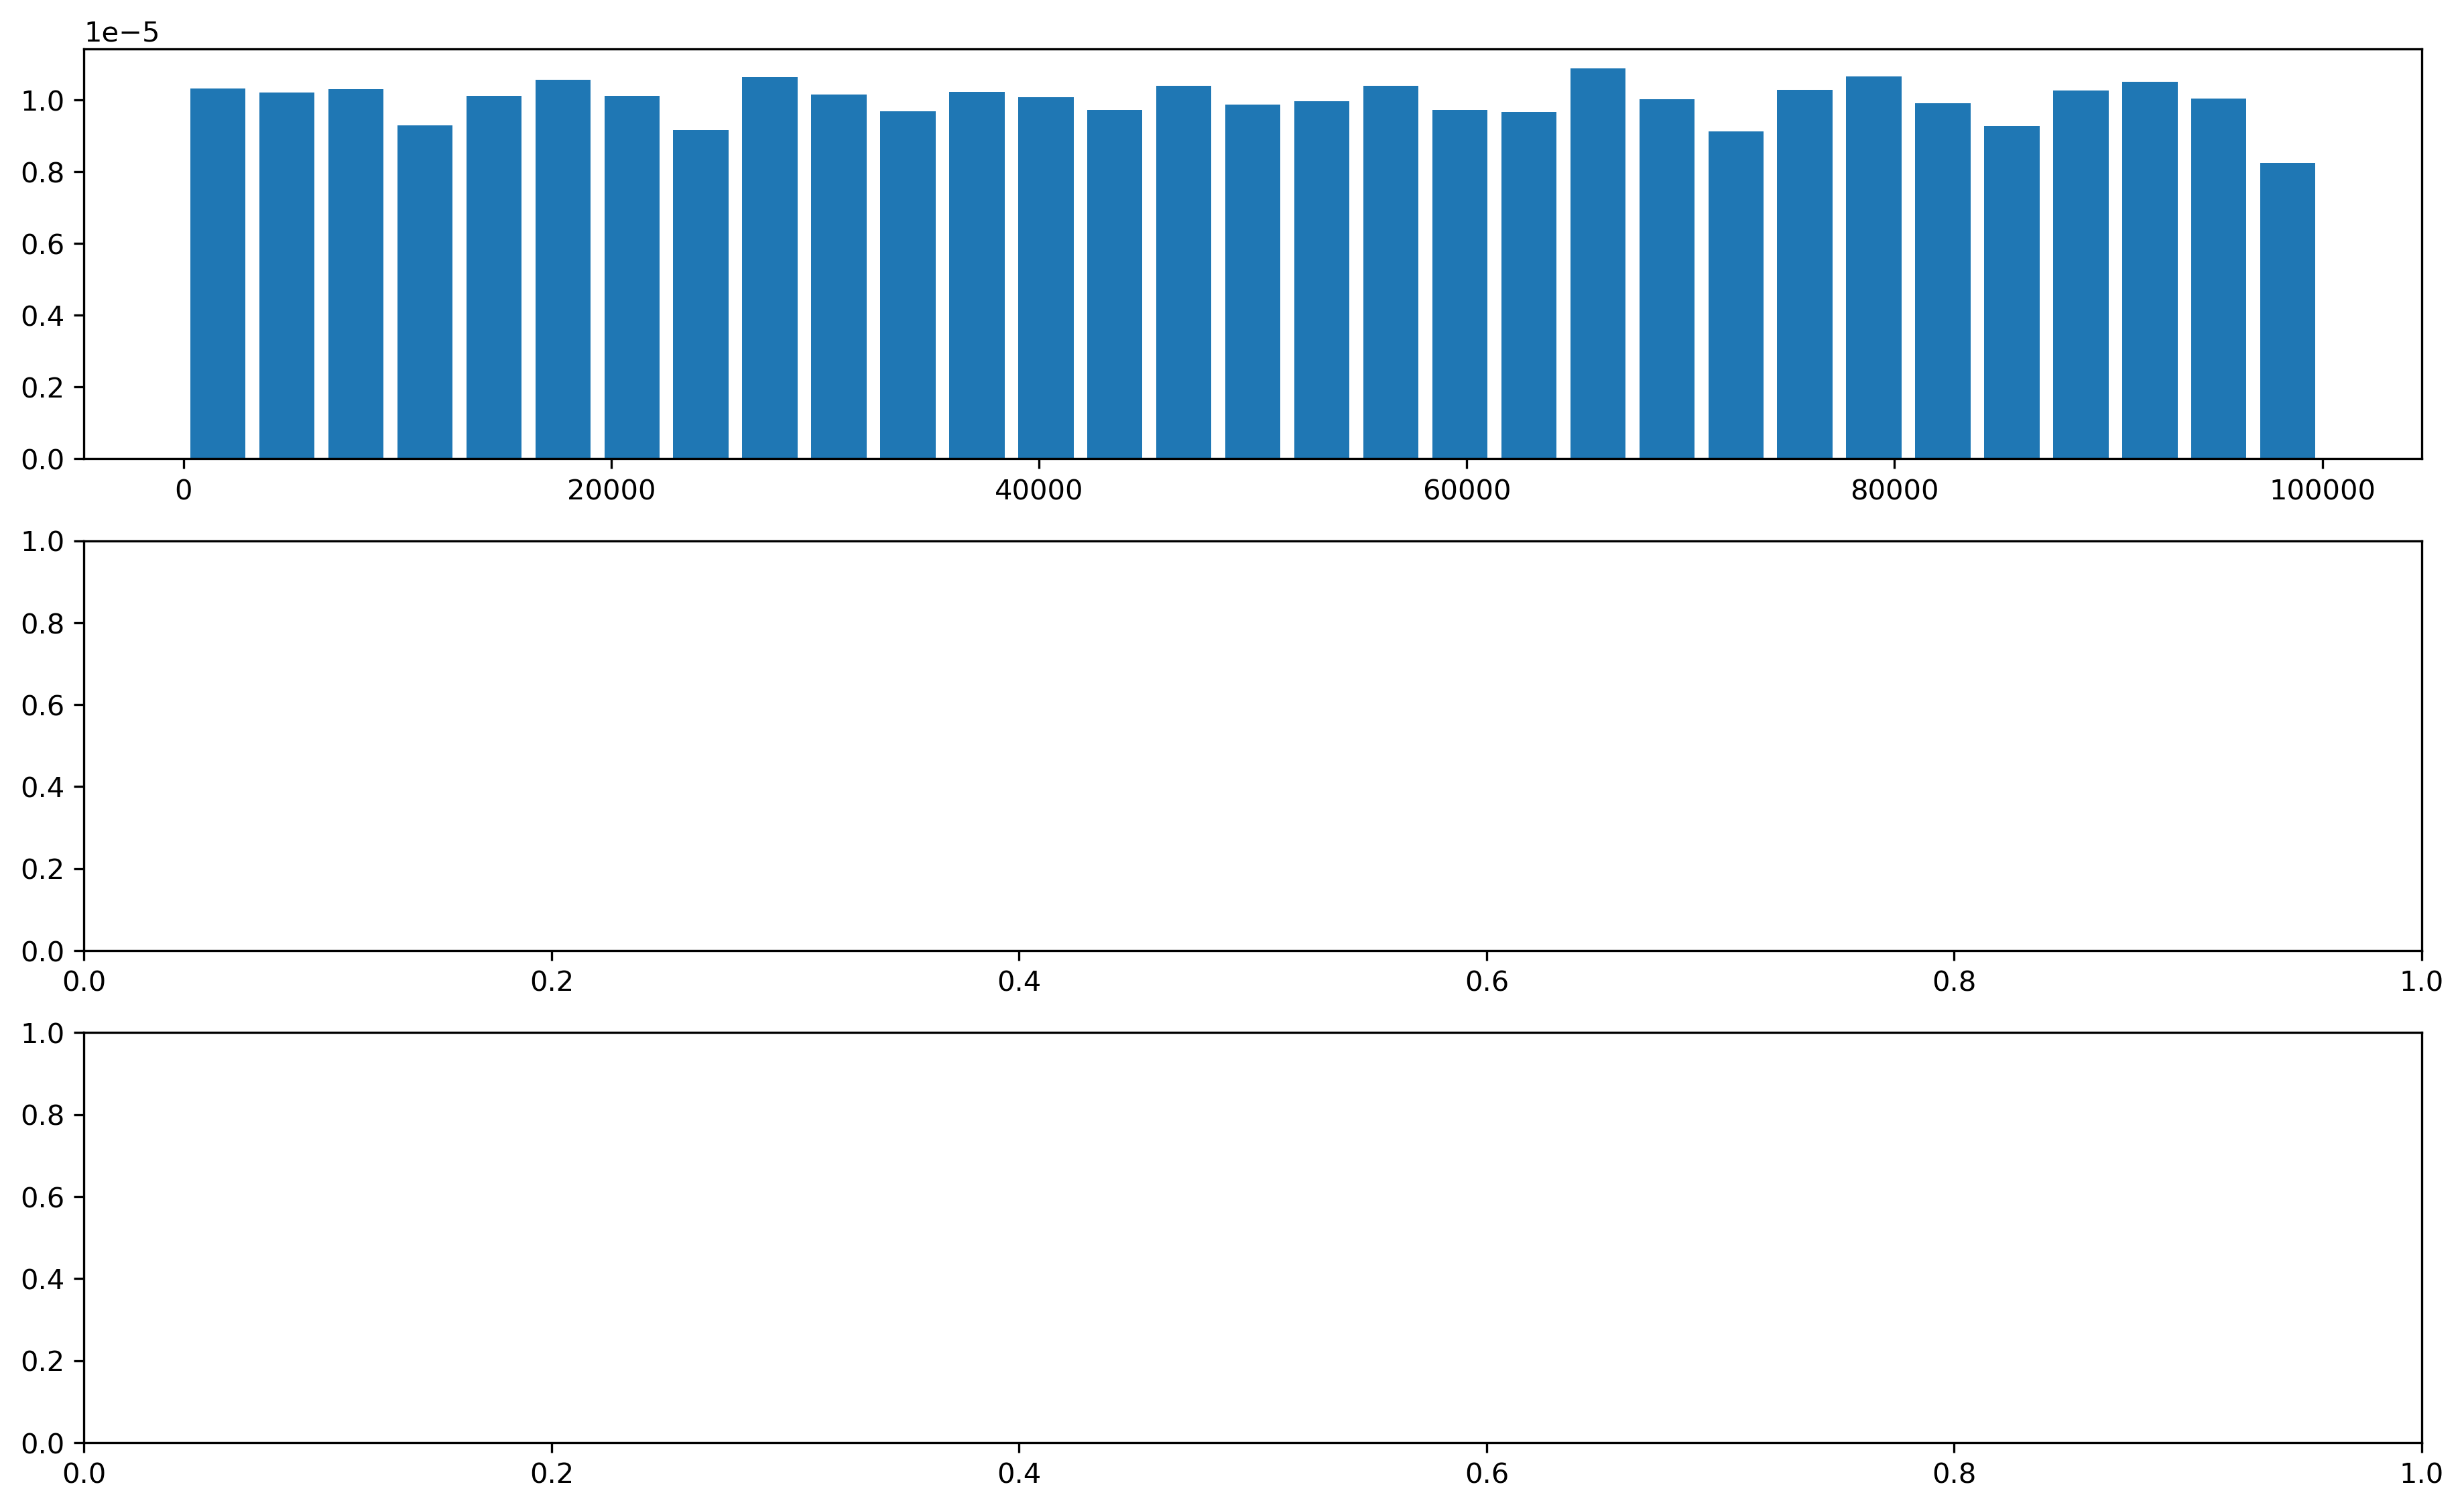

In [6]:
nrows=3
ncols=1
fig, ax = plt.subplots(3,1, figsize=(ncols*15, nrows*3), dpi=300)
n, bin, patches = ax[0].hist(cr_stats[cr_stats.probav == 40]['shap1'], bins=31, density=True, rwidth=0.8)

In [7]:
den_40 = cr_stats[cr_stats.probav == 40].groupby('shap2').count().lon/cr_stats[cr_stats.probav == 40].groupby('shap2').count().lon.sum()
den_112 = cr_stats[cr_stats.probav == 112].groupby('shap2').count().lon/cr_stats[cr_stats.probav == 112].groupby('shap2').count().lon.sum()
den_126 = cr_stats[cr_stats.probav == 126].groupby('shap2').count().lon/cr_stats[cr_stats.probav == 126].groupby('shap2').count().lon.sum()

In [8]:
#den_40 = cr_stats[cr_stats.probav == 40].groupby('shap2').count().lon/cr_stats[cr_stats.probav == 40].groupby('shap2').count().lon.sum()
print(den_40)#.sum()
den_40.loc[[3, 7, 11, 15, 19, 23, 27, 31]]

shap2
3     0.000180
4     0.000722
5     0.001389
6     0.000801
7     0.000617
8     0.001545
9     0.001579
10    0.001415
11    0.003948
12    0.005886
13    0.005370
14    0.004239
15    0.070799
16    0.056041
17    0.076340
18    0.080639
19    0.023811
20    0.027838
21    0.026184
22    0.023702
23    0.102331
24    0.136368
25    0.169302
26    0.126254
27    0.011969
28    0.010072
29    0.009742
30    0.009397
31    0.003403
32    0.002455
33    0.003033
34    0.002630
Name: lon, dtype: float64


shap2
3     0.000180
7     0.000617
11    0.003948
15    0.070799
19    0.023811
23    0.102331
27    0.011969
31    0.003403
Name: lon, dtype: float64

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (32,) and arg 5 with shape (28,).

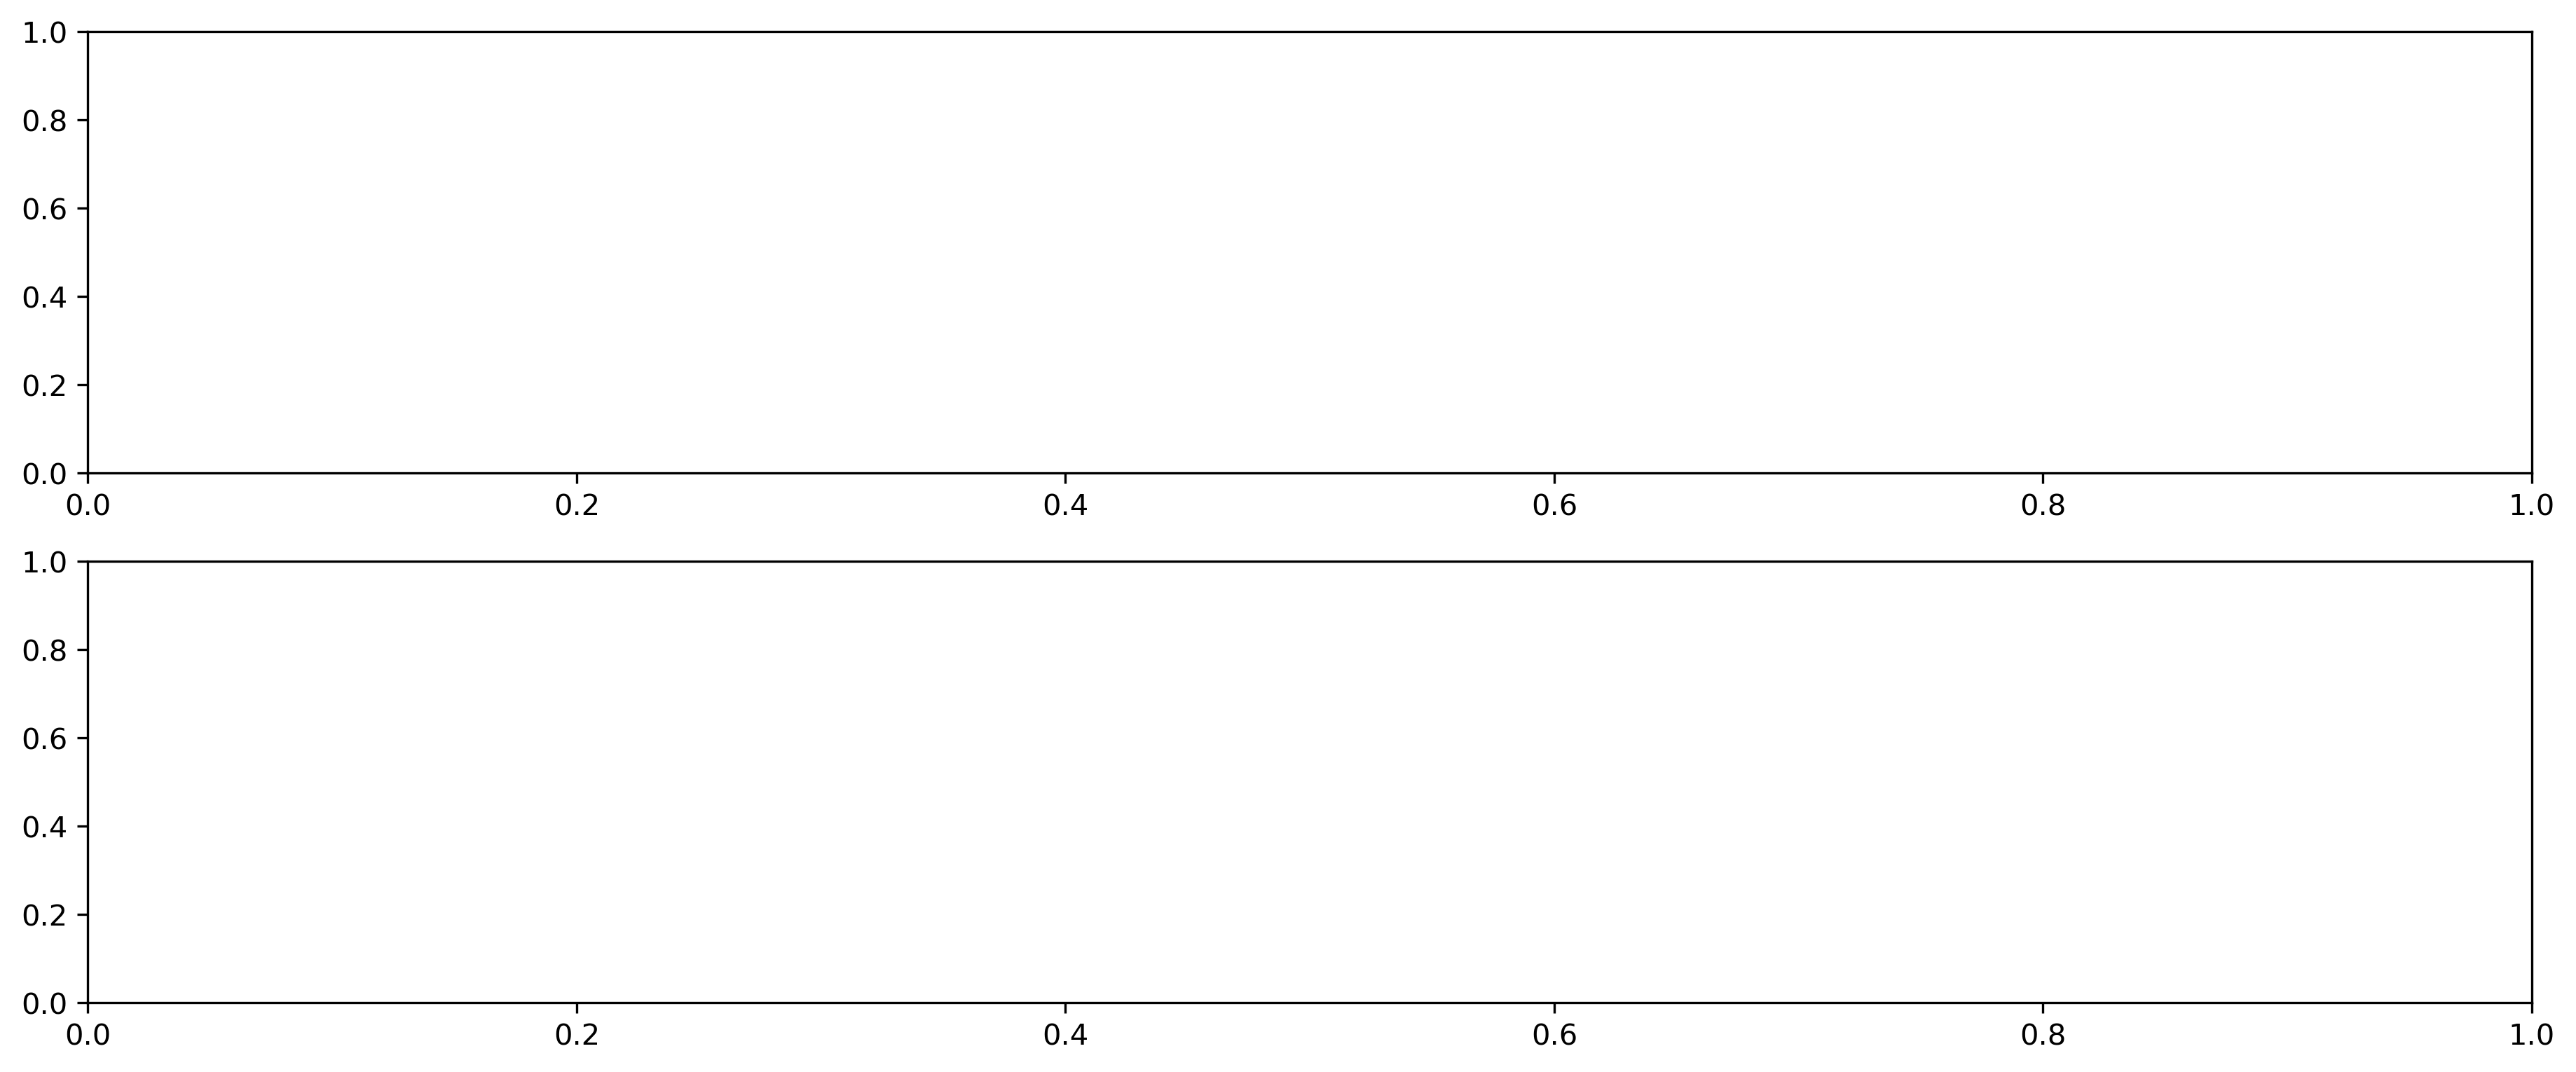

In [9]:
var_colors = ['red', 'red','red','red', 'blue', 'blue', 'blue', 'blue', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'springgreen', 'springgreen', 'springgreen', 'springgreen', 'palegreen', 'palegreen', 'palegreen', 'palegreen', 'pink', 'pink', 'pink', 'pink']
var_hatch = ['--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\']
nrows=2
ncols=1
fig, ax = plt.subplots(nrows,ncols, figsize=(ncols*15, nrows*3), dpi=300)
ax[0].bar(den_40.index, den_40, color=var_colors, hatch=var_hatch)

jbk@landscape:/data1/jbk/projects/climate/tropics/era5/shap_analysis$ r.stats -cnpl PROBAV_LC100_global_v3.0.1_2019
 100%
0  177312 0.13%
20 Shrubs 859595 0.64%
30 Herbaceous vegetation 1715245 1.28%
40 Cultivated and managed vegetation/agriculture (cropland) 39543455 29.54%
50 Urban/built up 1596154 1.19%
80 Permanent water bodies 880263 0.66%
90 Herbaceous wetland 1345636 1.01%
112 Closed forest evergreen broad leaf 55089031 41.15%
114 Closed forest deciduous broad leaf 47339 0.04%
115 Closed forest mixed 38191 0.03%
116 Closed forest unknown 1856798 1.39%
122 Open forest evergreen broad leaf 6485741 4.85%
124 Open forest deciduous broad leaf 26058 0.02%
125 Open forest mixed 181 0.00%
126 Open forest unknown 14822685 11.07%
200 Open sea 9374569 7.00%
jbk@landscape:/data1/jbk/projects/climate/tropics/era5/shap_analysis$ r.stats -cnpl Beck_KG_V1_present_0p0083
 100%
0  9555328 7.14%
1 Af   Tropical; rainforest 48690410 36.37%
2 Am   Tropical; monsoon 37635620 28.12%
3 Aw   Tropical; savannah 23209772 17.34%
12 Cwb  Temperate; dry winter; warm summer 4558343 3.41%
13 Cwc  Temperate; dry winter; cold summer 66658 0.05%
15 Cfb  Temperate; no dry season; warm summer 9109394 6.81%
16 Cfc  Temperate; no dry season; cold summer 76764 0.06%
29 ET   Polar; tundra 955964 0.71%


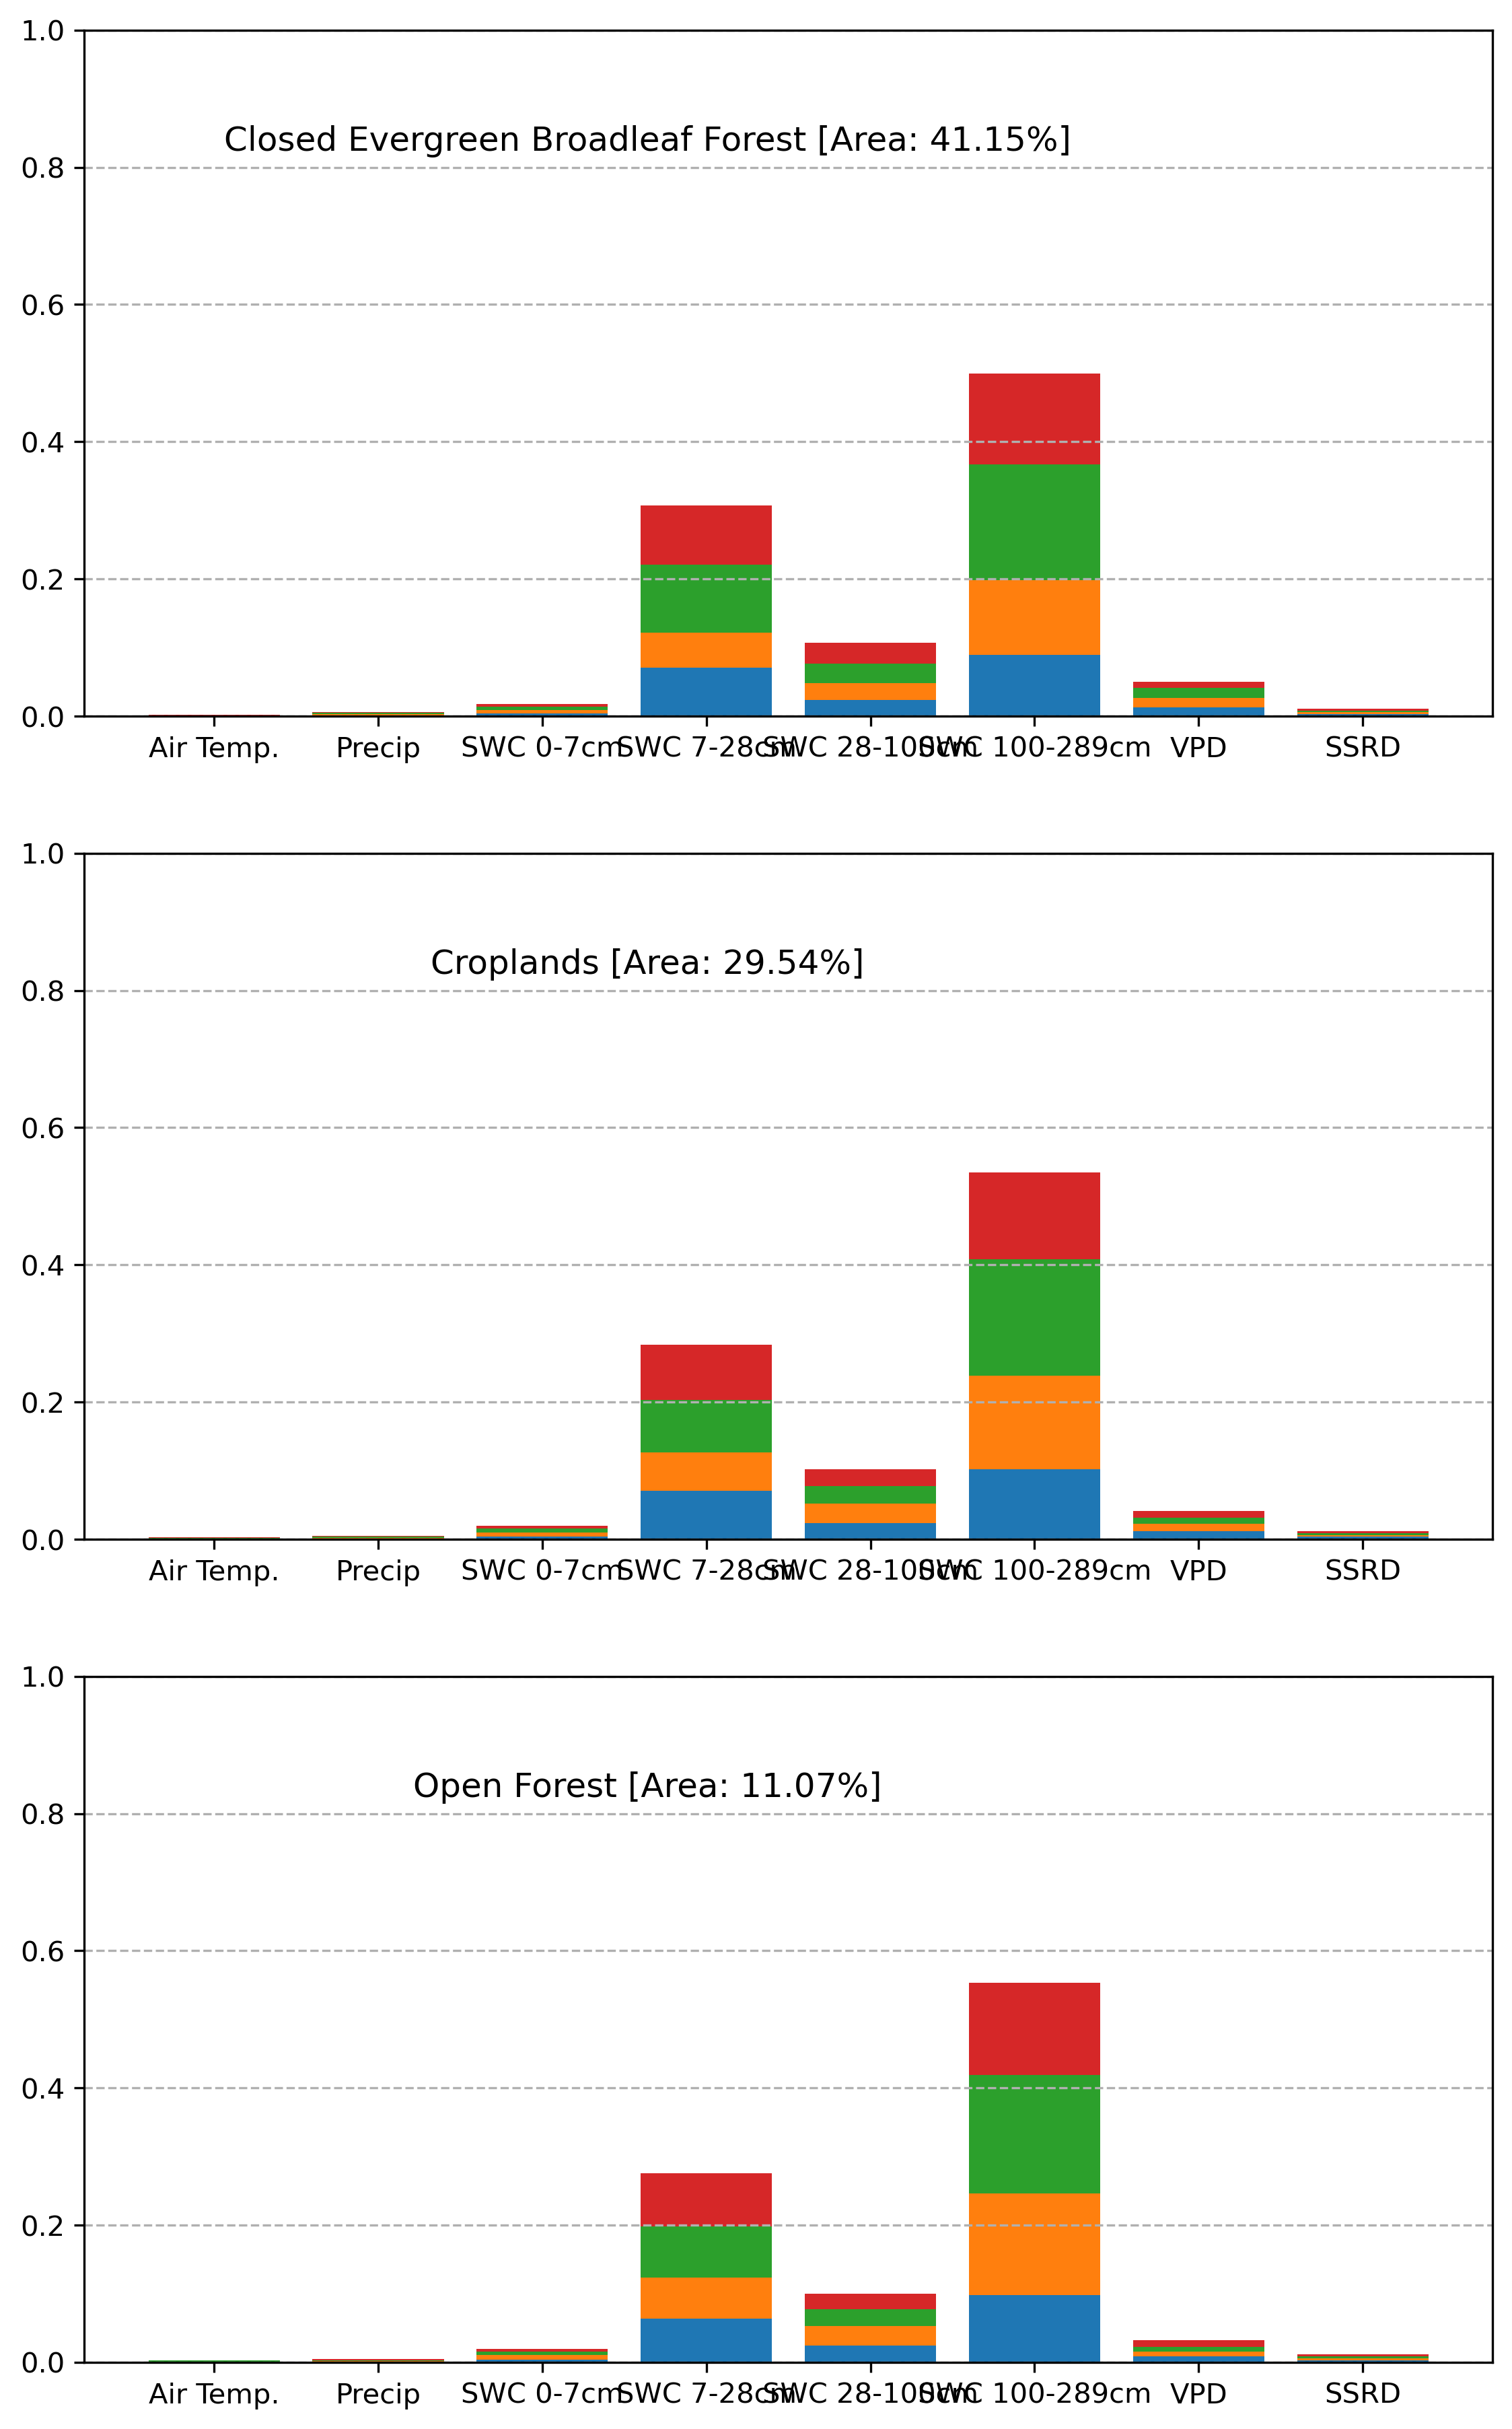

In [10]:
# Plot dominant driver distribution by landcover type

var_colors = ['red', 'red','red','red', 'blue', 'blue', 'blue', 'blue', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'springgreen', 'springgreen', 'springgreen', 'springgreen', 'palegreen', 'palegreen', 'palegreen', 'palegreen', 'pink', 'pink', 'pink', 'pink']
var_hatch = ['--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\']
nrows=3
ncols=1
fig, ax = plt.subplots(nrows,ncols, figsize=(nrows*3, ncols*15), dpi=300)

##########################################
# Closed Evergreen Broadleaf Forest 41.15%
den_112_0 = den_112.loc[[3, 7, 11, 15, 19, 23, 27, 31]].reset_index(drop=True)
den_112_1 = den_112.loc[[4, 8, 12, 16, 20, 24, 28, 32]].reset_index(drop=True)
den_112_2 = den_112.loc[[5, 9, 13, 17, 21, 25, 29, 33]].reset_index(drop=True)
den_112_3 = den_112.loc[[6, 10, 14, 18, 22, 26, 30, 34]].reset_index(drop=True)
ax[0].bar(list(range(0,8)), den_112_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[0].bar(list(range(0,8)), den_112_1, bottom=den_112_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[0].bar(list(range(0,8)), den_112_2, bottom=den_112_0 + den_112_1) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[0].bar(list(range(0,8)), den_112_3, bottom=den_112_0 + den_112_1 + den_112_2) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[0].grid(axis='y', linestyle='--')
ax[0].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[0].set_ylim([0,1])
ax[0].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-7cm', 'SWC 7-28cm', 'SWC 28-100cm', 'SWC 100-289cm', 'VPD', 'SSRD'])
ax[0].set_title("Closed Evergreen Broadleaf Forest [Area: 41.15%]", x=0.4, y=0.8)

##########################################
# Croplands 29.54%
den_40_0 = den_40.loc[[3, 7, 11, 15, 19, 23, 27, 31]].reset_index(drop=True)
den_40_1 = den_40.loc[[4, 8, 12, 16, 20, 24, 28, 32]].reset_index(drop=True)
den_40_2 = den_40.loc[[5, 9, 13, 17, 21, 25, 29, 33]].reset_index(drop=True)
den_40_3 = den_40.loc[[6, 10, 14, 18, 22, 26, 30, 34]].reset_index(drop=True)
ax[1].bar(list(range(0,8)), den_40_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[1].bar(list(range(0,8)), den_40_1, bottom=den_40_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[1].bar(list(range(0,8)), den_40_2, bottom=den_40_0 + den_40_1) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[1].bar(list(range(0,8)), den_40_3, bottom=den_40_0 + den_40_1 + den_40_2) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[1].grid(axis='y', linestyle='--')
ax[1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[1].set_ylim([0,1])
ax[1].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-7cm', 'SWC 7-28cm', 'SWC 28-100cm', 'SWC 100-289cm', 'VPD', 'SSRD'])
ax[1].set_title("Croplands [Area: 29.54%]", x=0.4, y=0.8)

##########################################
# Open Forest 11.07%
den_126_0 = den_126.loc[[3, 7, 11, 15, 19, 23, 27, 31]].reset_index(drop=True)
den_126_1 = den_126.loc[[4, 8, 12, 16, 20, 24, 28, 32]].reset_index(drop=True)
den_126_2 = den_126.loc[[5, 9, 13, 17, 21, 25, 29, 33]].reset_index(drop=True)
den_126_3 = den_126.loc[[6, 10, 14, 18, 22, 26, 30, 34]].reset_index(drop=True)

ax[2].bar(list(range(0,8)), den_126_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[2].bar(list(range(0,8)), den_126_1, bottom=den_126_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[2].bar(list(range(0,8)), den_126_2, bottom=den_126_0 + den_126_1) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[2].bar(list(range(0,8)), den_126_3, bottom=den_126_0 + den_126_1 + den_126_2) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[2].grid(axis='y', linestyle='--')
ax[2].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[2].set_ylim([0,1])
ax[2].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-7cm', 'SWC 7-28cm', 'SWC 28-100cm', 'SWC 100-289cm', 'VPD', 'SSRD'])
ax[2].set_title("Open Forest [Area: 11.07%]", x=0.4, y=0.8)

plt.savefig('costa_rica_shap_probav.png', bbox_inches='tight', facecolor='white', transparent=False)


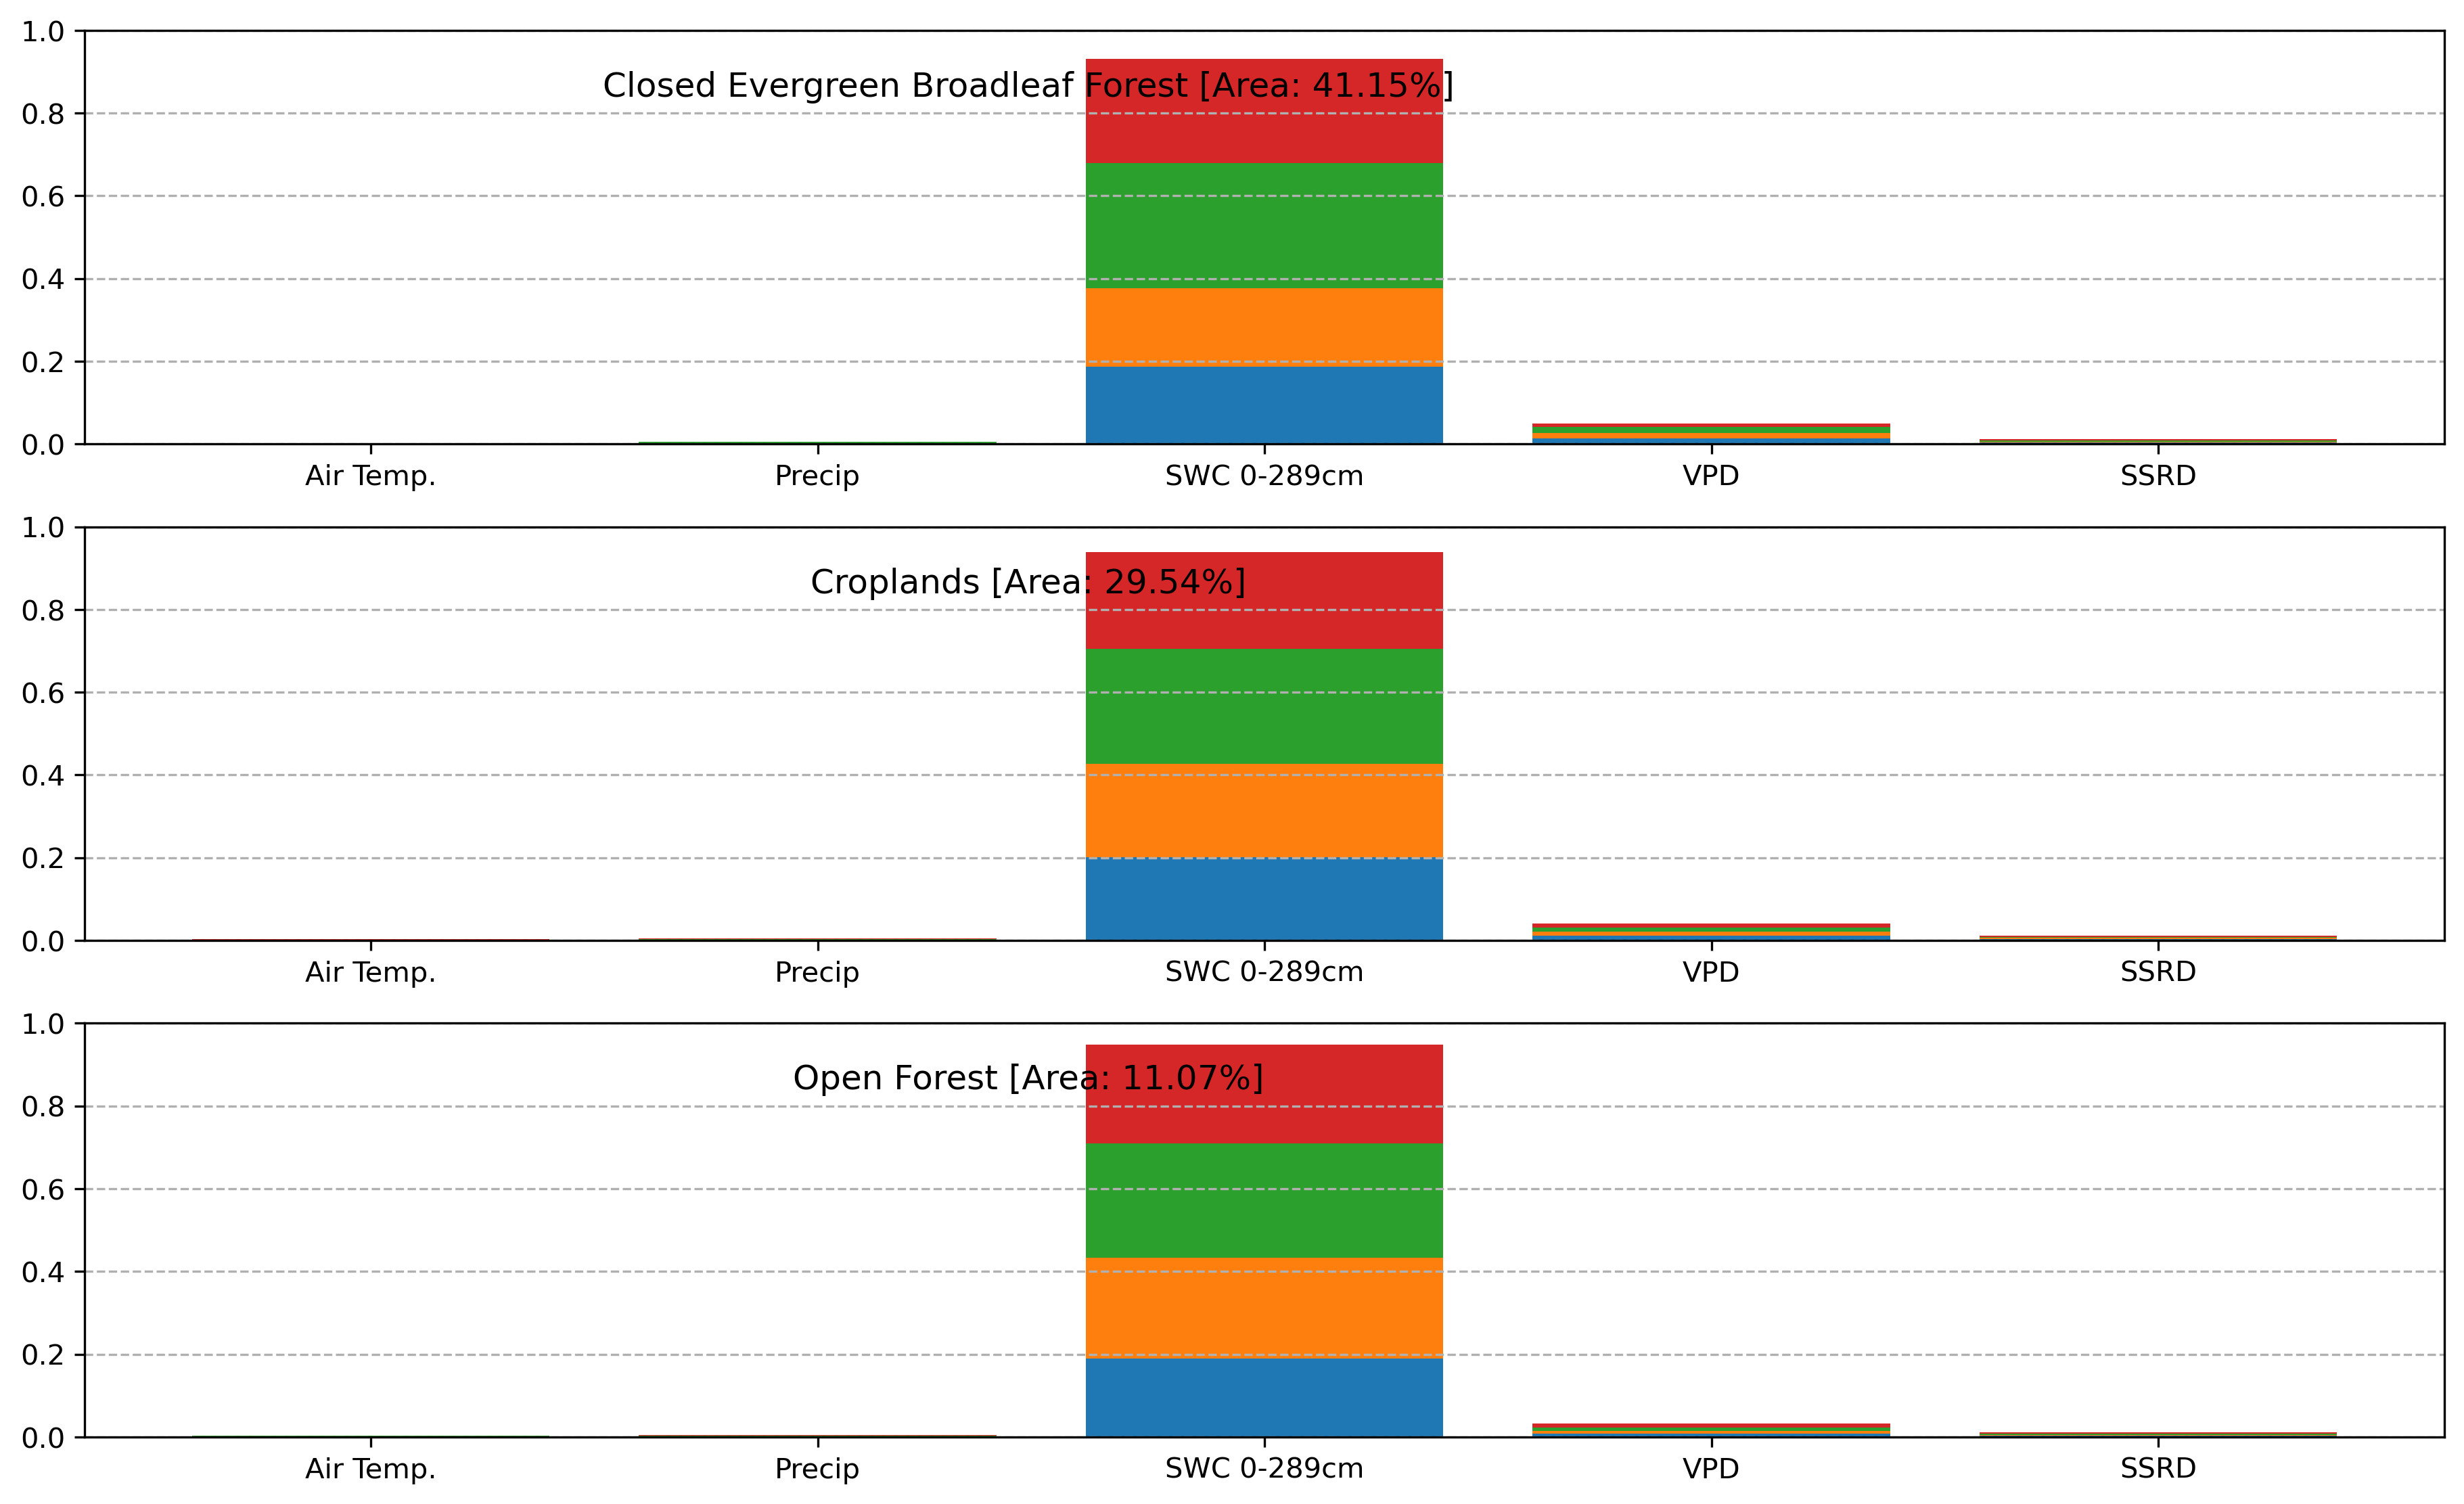

In [11]:
# Plot dominant driver distribution by landcover type
# Sum all SWC

var_colors = ['red', 'red','red','red', 'blue', 'blue', 'blue', 'blue', 'darkgreen', 'darkgreen', 'darkgreen', 'darkgreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'springgreen', 'springgreen', 'springgreen', 'springgreen', 'palegreen', 'palegreen', 'palegreen', 'palegreen', 'pink', 'pink', 'pink', 'pink']
var_hatch = ['--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\', '--', '+', 'x', '\\']

fig, ax = plt.subplots(3,1, figsize=(ncols*15, nrows*3), dpi=300)

##########################################
# Closed Evergreen Broadleaf Forest 41.15%
den_112_0 = den_112.loc[[3, 7, 11, 15, 19, 23, 27, 31]].reset_index(drop=True)
den_112_1 = den_112.loc[[4, 8, 12, 16, 20, 24, 28, 32]].reset_index(drop=True)
den_112_2 = den_112.loc[[5, 9, 13, 17, 21, 25, 29, 33]].reset_index(drop=True)
den_112_3 = den_112.loc[[6, 10, 14, 18, 22, 26, 30, 34]].reset_index(drop=True)

# Sum SWC at all depths
den_112_0[8] = den_112_0[2] + den_112_0[3] + den_112_0[4] + den_112_0[5]
den_112_1[8] = den_112_1[2] + den_112_1[3] + den_112_1[4] + den_112_1[5]
den_112_2[8] = den_112_2[2] + den_112_2[3] + den_112_2[4] + den_112_2[5]
den_112_3[8] = den_112_3[2] + den_112_3[3] + den_112_3[4] + den_112_3[5]

ax[0].bar(list(range(0,5)), den_112_0[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[0].bar(list(range(0,5)), den_112_1[[0,1,8,6,7]], bottom=den_112_0[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[0].bar(list(range(0,5)), den_112_2[[0,1,8,6,7]], bottom=den_112_0[[0,1,8,6,7]] + den_112_1[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[0].bar(list(range(0,5)), den_112_3[[0,1,8,6,7]], bottom=den_112_0[[0,1,8,6,7]] + den_112_1[[0,1,8,6,7]] + den_112_2[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[0].grid(axis='y', linestyle='--')
ax[0].set_xticks([0, 1, 2, 3, 4])
ax[0].set_ylim([0,1])
ax[0].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD', 'SSRD'])
ax[0].set_title("Closed Evergreen Broadleaf Forest [Area: 41.15%]", x=0.4, y=0.8)

##########################################
# Croplands 29.54%
den_40_0 = den_40.loc[[3, 7, 11, 15, 19, 23, 27, 31]].reset_index(drop=True)
den_40_1 = den_40.loc[[4, 8, 12, 16, 20, 24, 28, 32]].reset_index(drop=True)
den_40_2 = den_40.loc[[5, 9, 13, 17, 21, 25, 29, 33]].reset_index(drop=True)
den_40_3 = den_40.loc[[6, 10, 14, 18, 22, 26, 30, 34]].reset_index(drop=True)

# Sum SWC at all depths
den_40_0[8] = den_40_0[2] + den_40_0[3] + den_40_0[4] + den_40_0[5]
den_40_1[8] = den_40_1[2] + den_40_1[3] + den_40_1[4] + den_40_1[5]
den_40_2[8] = den_40_2[2] + den_40_2[3] + den_40_2[4] + den_40_2[5]
den_40_3[8] = den_40_3[2] + den_40_3[3] + den_40_3[4] + den_40_3[5]

ax[1].bar(list(range(0,5)), den_40_0[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[1].bar(list(range(0,5)), den_40_1[[0,1,8,6,7]], bottom=den_40_0[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[1].bar(list(range(0,5)), den_40_2[[0,1,8,6,7]], bottom=den_40_0[[0,1,8,6,7]] + den_40_1[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[1].bar(list(range(0,5)), den_40_3[[0,1,8,6,7]], bottom=den_40_0[[0,1,8,6,7]] + den_40_1[[0,1,8,6,7]] + den_40_2[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[1].grid(axis='y', linestyle='--')
ax[1].set_xticks([0, 1, 2, 3, 4])
ax[1].set_ylim([0,1])
ax[1].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD', 'SSRD'])
ax[1].set_title("Croplands [Area: 29.54%]", x=0.4, y=0.8)

##########################################
# Open Forest 11.07%
den_126_0 = den_126.loc[[3, 7, 11, 15, 19, 23, 27, 31]].reset_index(drop=True)
den_126_1 = den_126.loc[[4, 8, 12, 16, 20, 24, 28, 32]].reset_index(drop=True)
den_126_2 = den_126.loc[[5, 9, 13, 17, 21, 25, 29, 33]].reset_index(drop=True)
den_126_3 = den_126.loc[[6, 10, 14, 18, 22, 26, 30, 34]].reset_index(drop=True)

# Sum SWC at all depths
den_126_0[8] = den_126_0[2] + den_126_0[3] + den_126_0[4] + den_126_0[5]
den_126_1[8] = den_126_1[2] + den_126_1[3] + den_126_1[4] + den_126_1[5]
den_126_2[8] = den_126_2[2] + den_126_2[3] + den_126_2[4] + den_126_2[5]
den_126_3[8] = den_126_3[2] + den_126_3[3] + den_126_3[4] + den_126_3[5]

ax[2].bar(list(range(0,5)), den_126_0[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[2].bar(list(range(0,5)), den_126_1[[0,1,8,6,7]], bottom=den_126_0[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[2].bar(list(range(0,5)), den_126_2[[0,1,8,6,7]], bottom=den_126_0[[0,1,8,6,7]] + den_126_1[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[2].bar(list(range(0,5)), den_126_3[[0,1,8,6,7]], bottom=den_126_0[[0,1,8,6,7]] + den_126_1[[0,1,8,6,7]] + den_126_2[[0,1,8,6,7]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[2].grid(axis='y', linestyle='--')
ax[2].set_xticks([0, 1, 2, 3, 4])
ax[2].set_ylim([0,1])
ax[2].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD', 'SSRD'])
ax[2].set_title("Open Forest [Area: 11.07%]", x=0.4, y=0.8)

plt.savefig('costa_rica_shap_probav_1.png', bbox_inches='tight', facecolor='white', transparent=False)


In [12]:
kg_1 = cr_stats[cr_stats.kg == 1].groupby('shap1').count().shap2/cr_stats[cr_stats.kg == 1].groupby('shap1').count().shap2.sum()
kg_2 = cr_stats[cr_stats.kg == 2].groupby('shap1').count().shap2/cr_stats[cr_stats.kg == 2].groupby('shap1').count().shap2.sum()
kg_3 = cr_stats[cr_stats.kg == 3].groupby('shap1').count().shap2/cr_stats[cr_stats.kg == 3].groupby('shap1').count().shap2.sum()
kg_12 = cr_stats[cr_stats.kg == 12].groupby('shap1').count().shap2/cr_stats[cr_stats.kg == 12].groupby('shap1').count().shap2.sum()
kg_15 = cr_stats[cr_stats.kg == 15].groupby('shap1').count().shap2/cr_stats[cr_stats.kg == 15].groupby('shap1').count().shap2.sum()

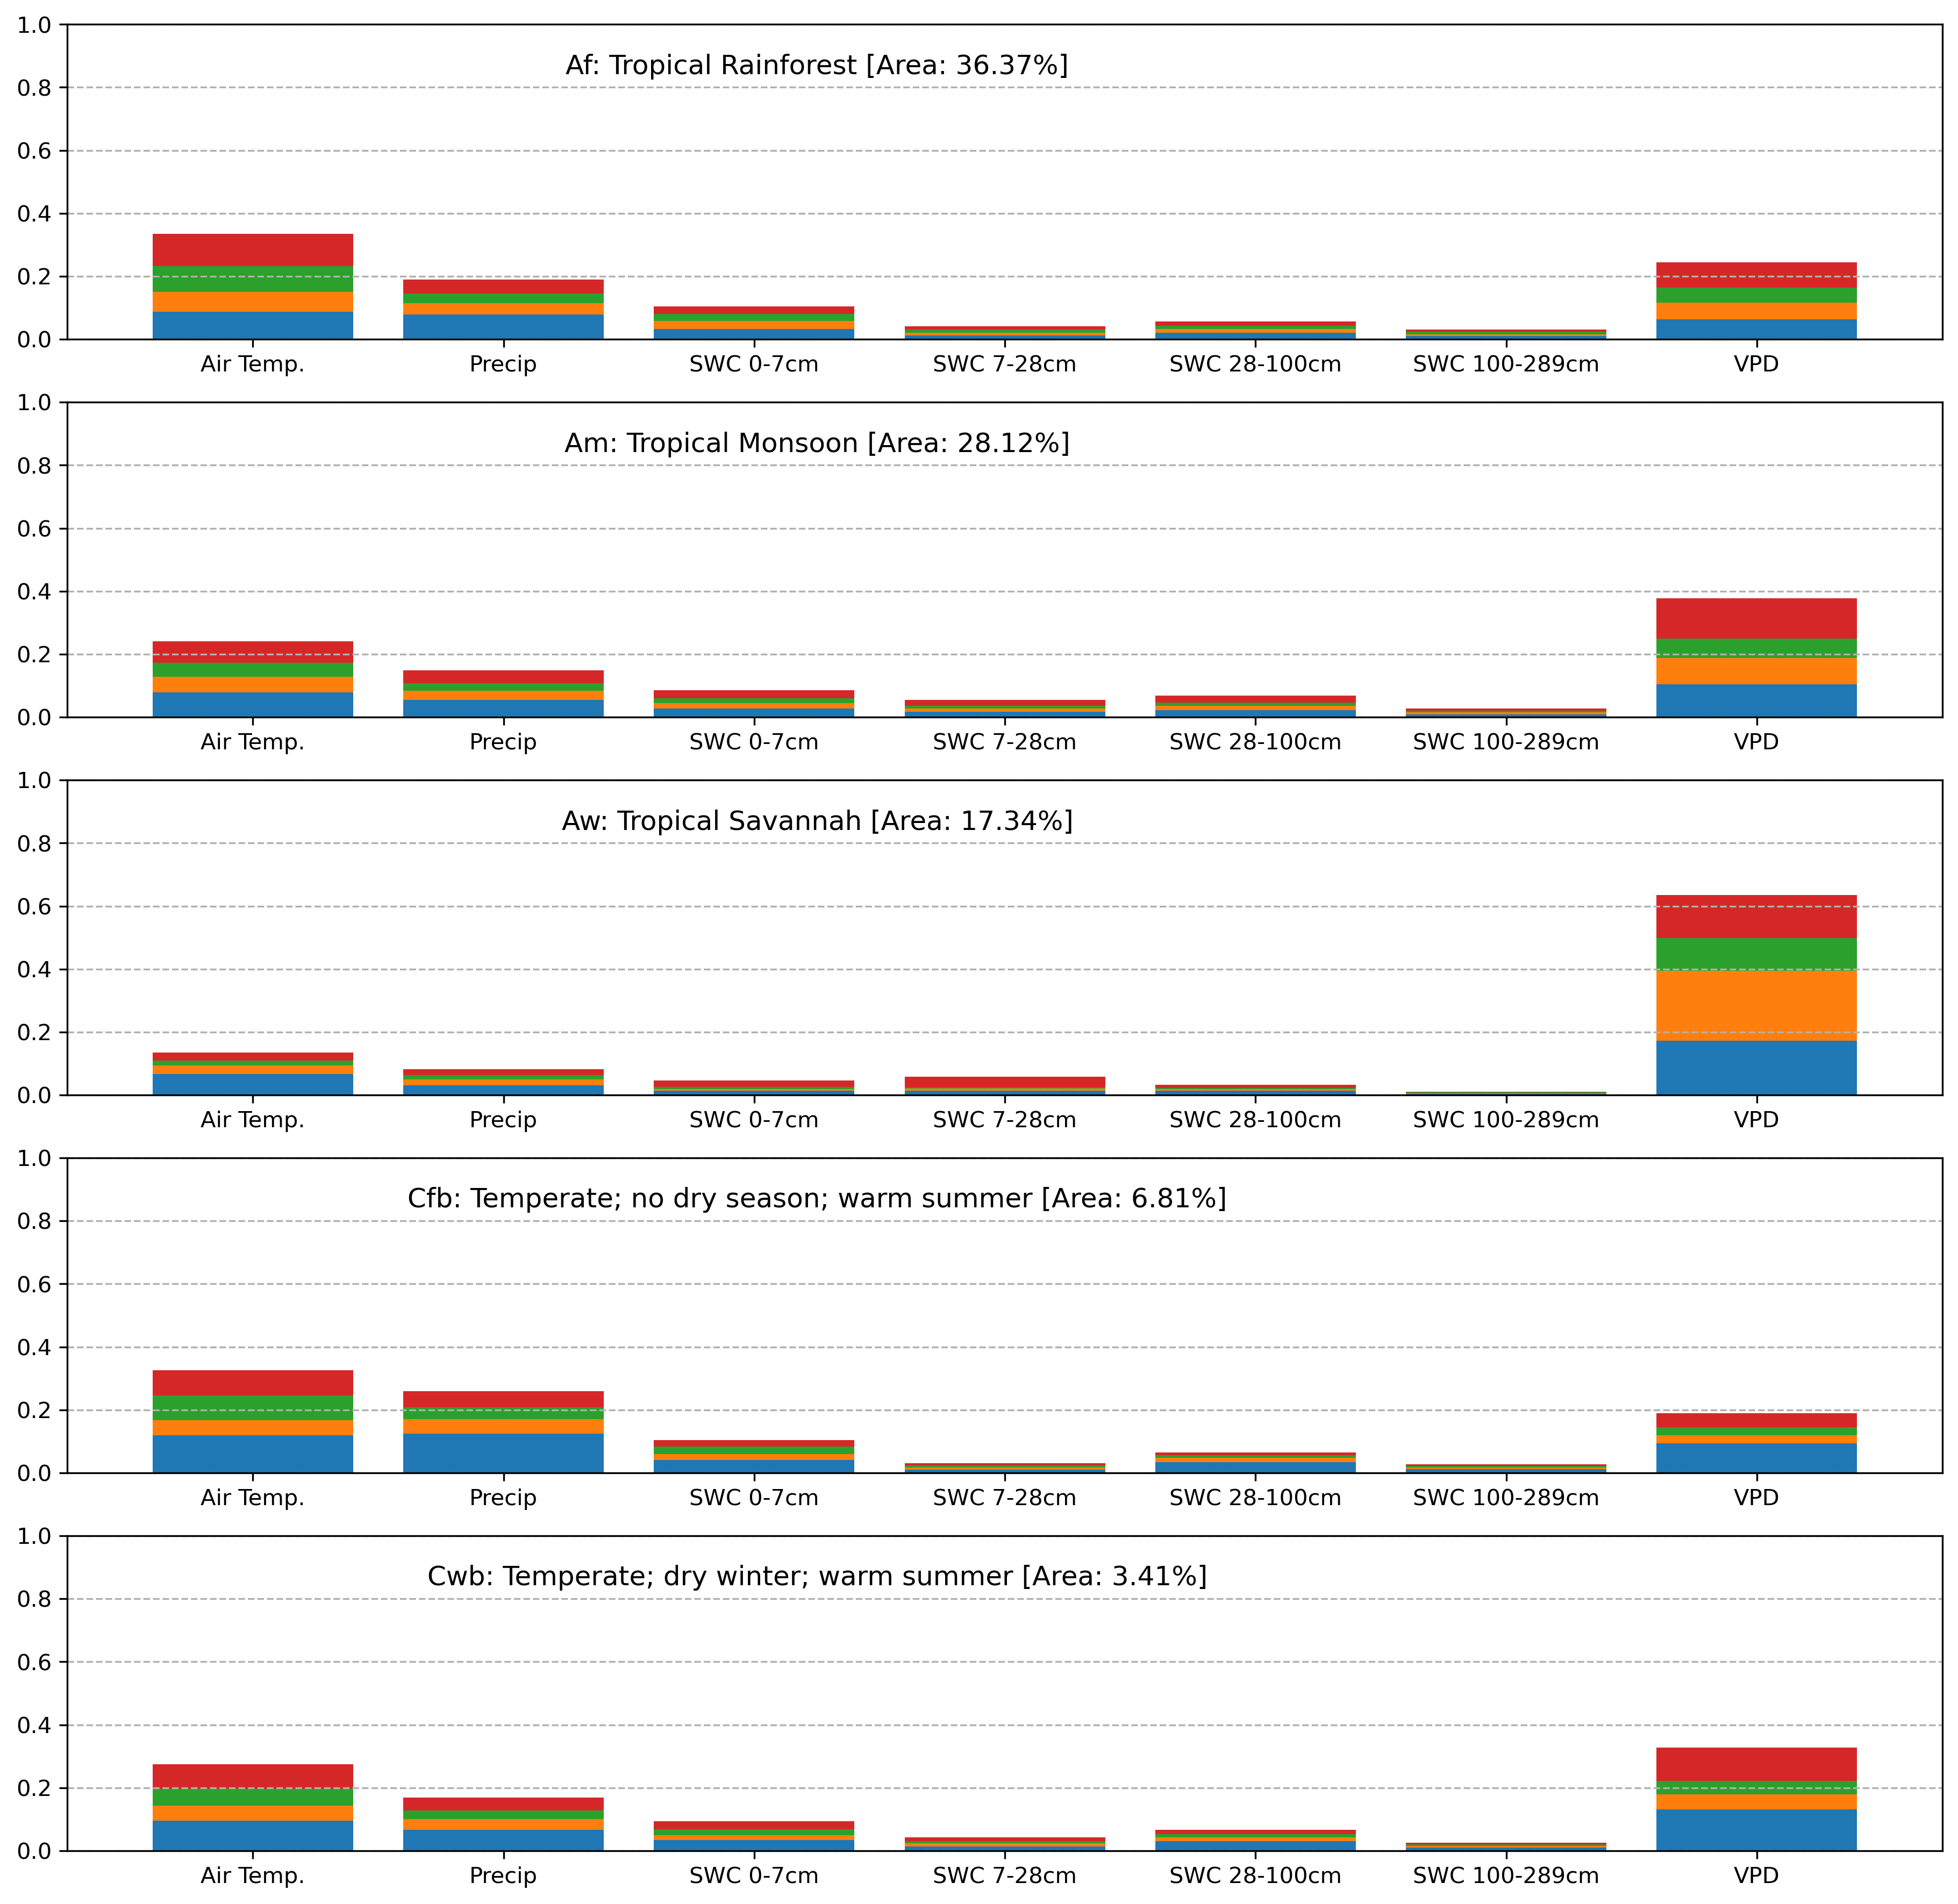

In [105]:
# Plot dominant driver distribution by Koppen Geiger Classes 

ncols=1
nrows=5
fig, ax = plt.subplots(nrows,ncols, figsize=(ncols*15, nrows*3), dpi=300)

# 1 Af: tropical Rainforest 36.37%
kg_1_0 = kg_1.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
kg_1_1 = kg_1.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
kg_1_2 = kg_1.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
kg_1_3 = kg_1.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)
ax[0].bar(list(range(0,7)), kg_1_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[0].bar(list(range(0,7)), kg_1_1, bottom=kg_1_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[0].bar(list(range(0,7)), kg_1_2, bottom=kg_1_0 + kg_1_1) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[0].bar(list(range(0,7)), kg_1_3, bottom=kg_1_0 + kg_1_1 + kg_1_2) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[0].grid(axis='y', linestyle='--')
ax[0].set_xticks([0, 1, 2, 3, 4, 5, 6])
ax[0].set_ylim([0,1])
ax[0].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-7cm', 'SWC 7-28cm', 'SWC 28-100cm', 'SWC 100-289cm', 'VPD'])
ax[0].set_title("Af: Tropical Rainforest [Area: 36.37%]", x=0.4, y=0.8)

# 2 Am: Tropical Monsoon 28.12%
kg_2_0 = kg_2.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
kg_2_1 = kg_2.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
kg_2_2 = kg_2.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
kg_2_3 = kg_2.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)
ax[1].bar(list(range(0,7)), kg_2_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[1].bar(list(range(0,7)), kg_2_1, bottom=kg_2_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[1].bar(list(range(0,7)), kg_2_2, bottom=kg_2_0 + kg_2_1) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[1].bar(list(range(0,7)), kg_2_3, bottom=kg_2_0 + kg_2_1 + kg_2_2) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[1].grid(axis='y', linestyle='--')
ax[1].set_xticks([0, 1, 2, 3, 4, 5, 6])
ax[1].set_ylim([0,1])
ax[1].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-7cm', 'SWC 7-28cm', 'SWC 28-100cm', 'SWC 100-289cm', 'VPD'])
ax[1].set_title("Am: Tropical Monsoon [Area: 28.12%]", x=0.4, y=0.8)


# 3 Aw: Tropical Savannah 17.34%
kg_3_0 = kg_3.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
kg_3_1 = kg_3.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
kg_3_2 = kg_3.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
kg_3_3 = kg_3.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)
ax[2].bar(list(range(0,7)), kg_3_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[2].bar(list(range(0,7)), kg_3_1, bottom=kg_3_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[2].bar(list(range(0,7)), kg_3_2, bottom=kg_3_0 + kg_3_1) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[2].bar(list(range(0,7)), kg_3_3, bottom=kg_3_0 + kg_3_1 + kg_3_2) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[2].grid(axis='y', linestyle='--')
ax[2].set_xticks([0, 1, 2, 3, 4, 5, 6])
ax[2].set_ylim([0,1])
ax[2].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-7cm', 'SWC 7-28cm', 'SWC 28-100cm', 'SWC 100-289cm', 'VPD'])
ax[2].set_title("Aw: Tropical Savannah [Area: 17.34%]", x=0.4, y=0.8)


# 15 Cfb: Temperate; no dry season; warm summer 6.81%
kg_15_0 = kg_15.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
kg_15_1 = kg_15.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
kg_15_2 = kg_15.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
kg_15_3 = kg_15.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)
ax[3].bar(list(range(0,7)), kg_15_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[3].bar(list(range(0,7)), kg_15_1, bottom=kg_15_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[3].bar(list(range(0,7)), kg_15_2, bottom=kg_15_0 + kg_15_1) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[3].bar(list(range(0,7)), kg_15_3, bottom=kg_15_0 + kg_15_1 + kg_15_2) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[3].grid(axis='y', linestyle='--')
ax[3].set_xticks([0, 1, 2, 3, 4, 5, 6])
ax[3].set_ylim([0,1])
ax[3].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-7cm', 'SWC 7-28cm', 'SWC 28-100cm', 'SWC 100-289cm', 'VPD'])
ax[3].set_title("Cfb: Temperate; no dry season; warm summer [Area: 6.81%]", x=0.4, y=0.8)


# 12 Cwb: Temperate; dry winter; warm summer 3.41%
kg_12_0 = kg_12.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
kg_12_1 = kg_12.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
kg_12_2 = kg_12.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
kg_12_3 = kg_12.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)
ax[4].bar(list(range(0,7)), kg_12_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[4].bar(list(range(0,7)), kg_12_1, bottom=kg_12_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[4].bar(list(range(0,7)), kg_12_2, bottom=kg_12_0 + kg_12_1) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[4].bar(list(range(0,7)), kg_12_3, bottom=kg_12_0 + kg_12_1 + kg_12_2) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[4].grid(axis='y', linestyle='--')
ax[4].set_xticks([0, 1, 2, 3, 4, 5, 6])
ax[4].set_ylim([0,1])
ax[4].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-7cm', 'SWC 7-28cm', 'SWC 28-100cm', 'SWC 100-289cm', 'VPD'])
ax[4].set_title("Cwb: Temperate; dry winter; warm summer [Area: 3.41%]", x=0.4, y=0.8)
plt.savefig('costa_rica_shap_kg.png', bbox_inches='tight', facecolor='white', transparent=False)


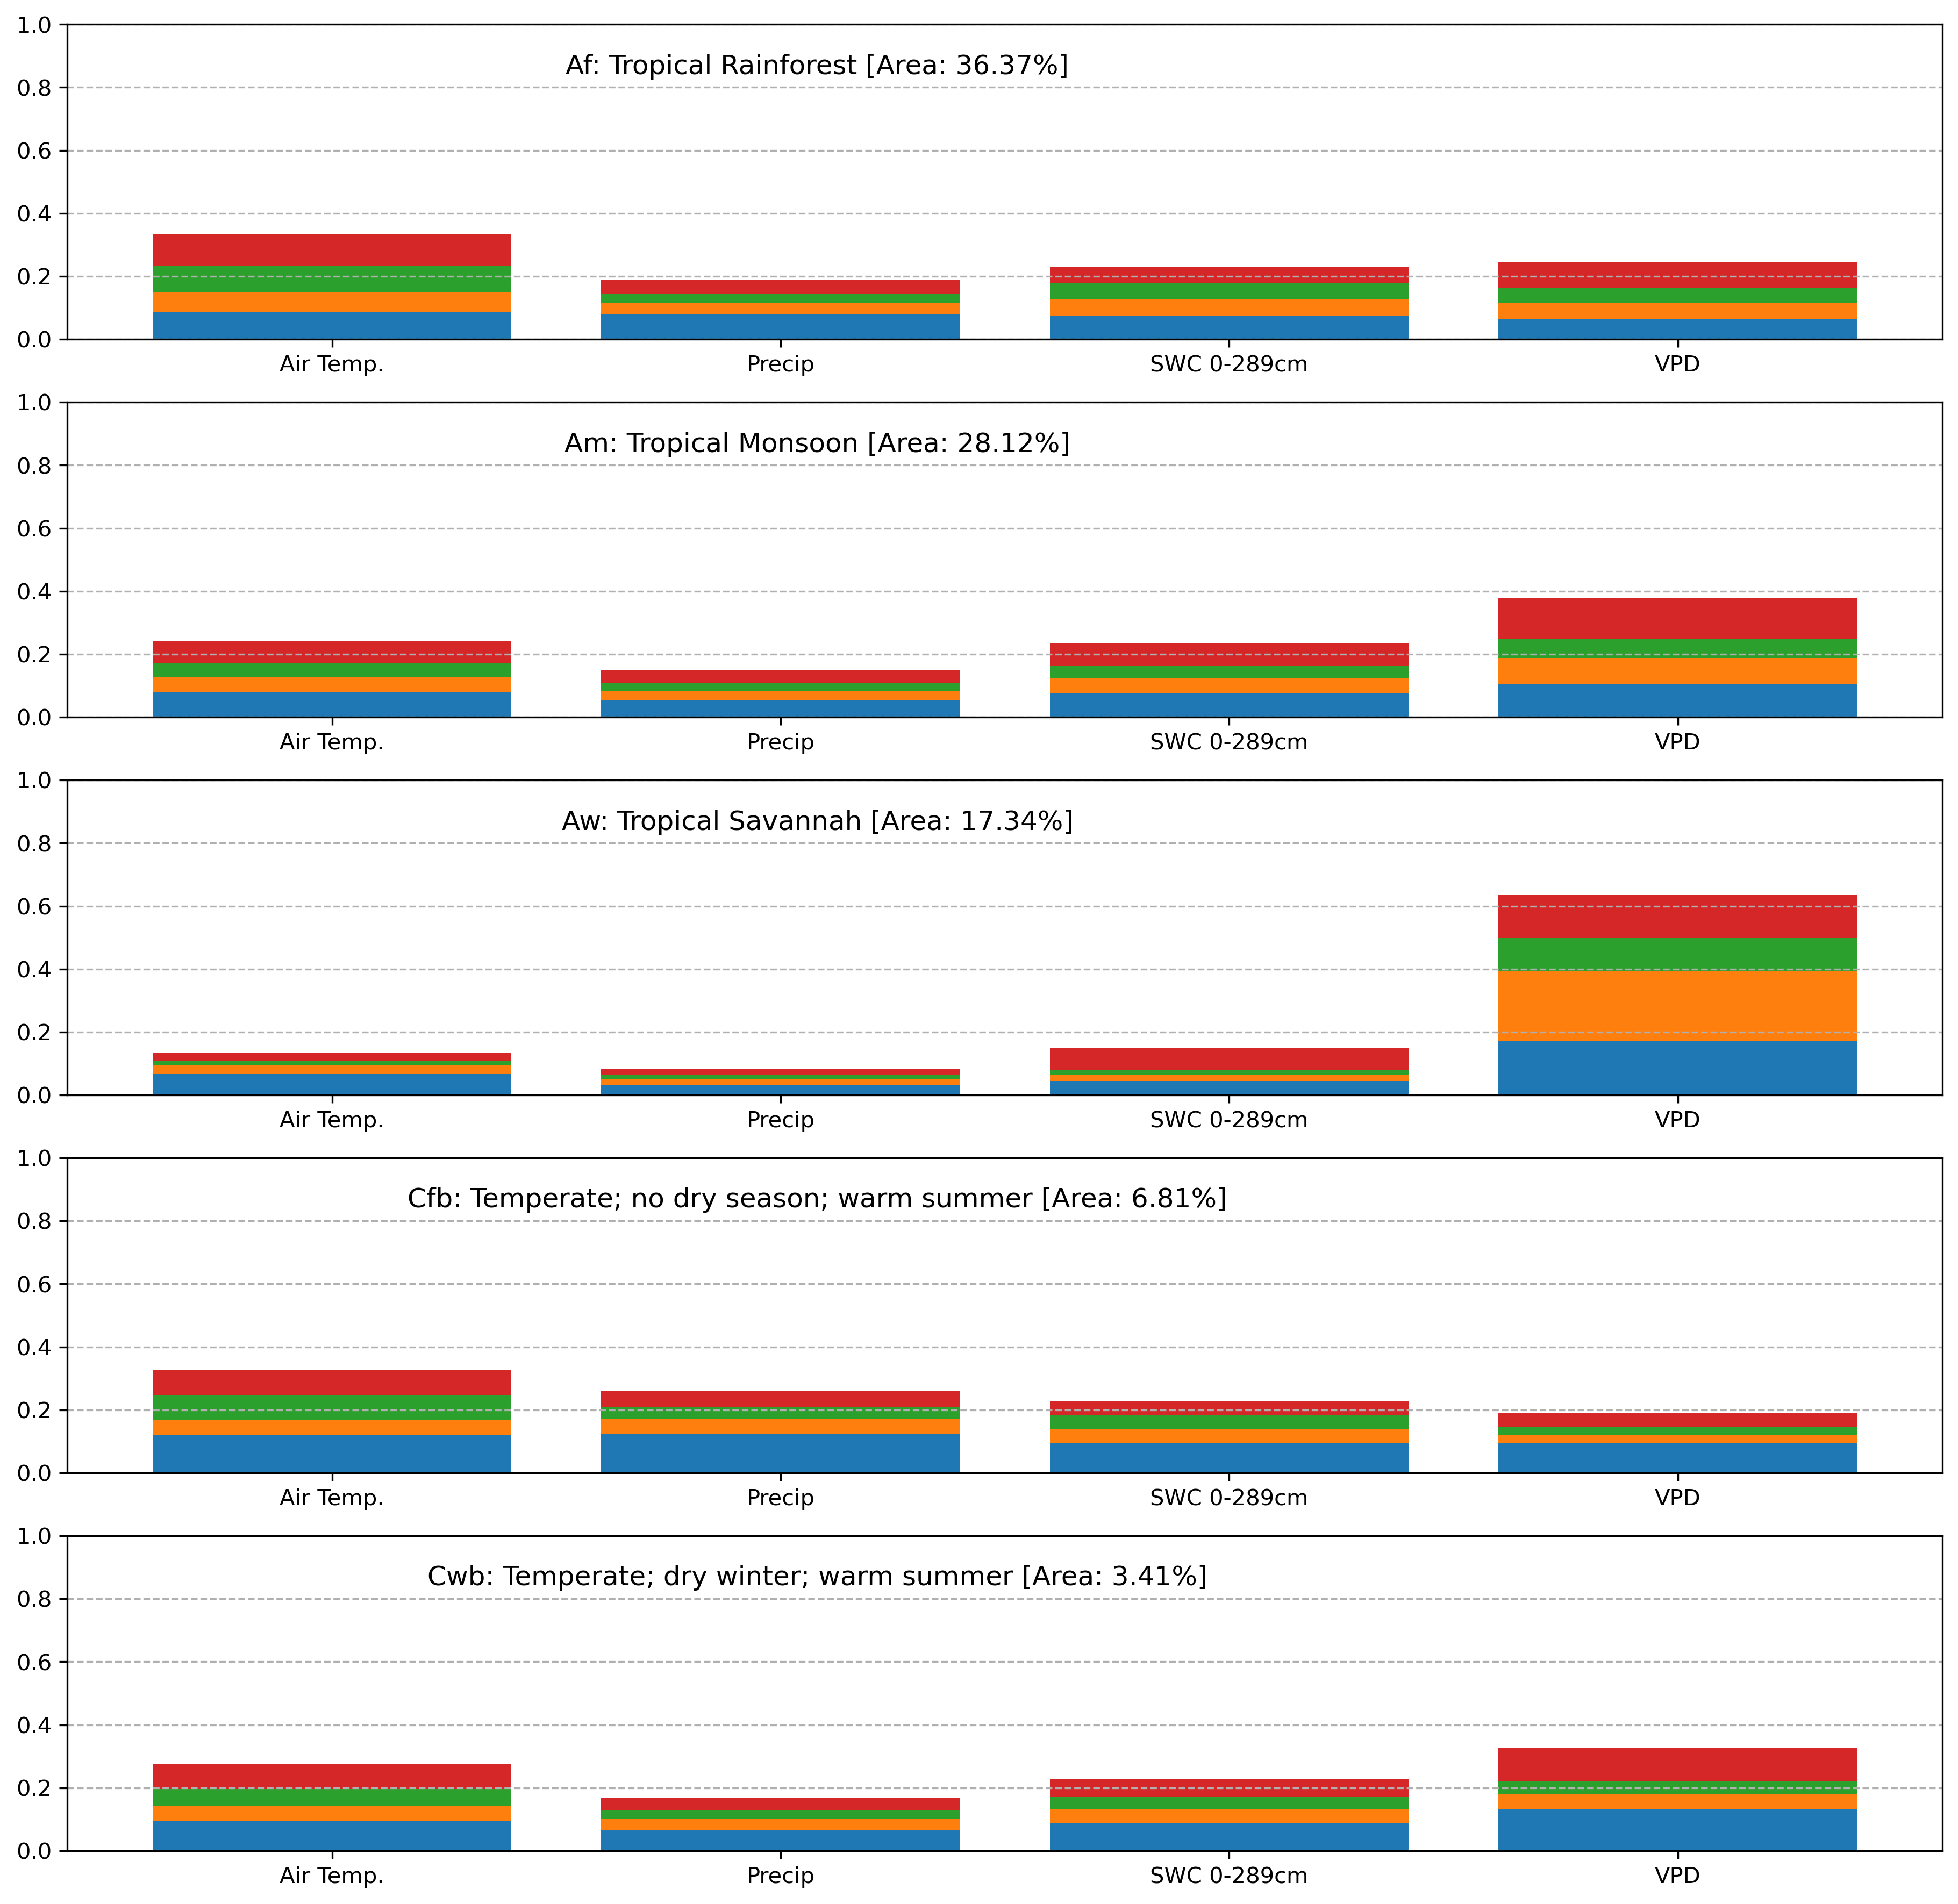

In [128]:
# Plot dominant driver distribution by Koppen Geiger Classes 
# Sum all SWC

ncols=1
nrows=5
fig, ax = plt.subplots(nrows,ncols, figsize=(ncols*15, nrows*3), dpi=300)

##################################
# 1 Af: tropical Rainforest 36.37%
kg_1_0 = kg_1.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
kg_1_1 = kg_1.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
kg_1_2 = kg_1.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
kg_1_3 = kg_1.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
kg_1_0[7] = kg_1_0[2] + kg_1_0[3] + kg_1_0[4] + kg_1_0[5]
kg_1_1[7] = kg_1_1[2] + kg_1_1[3] + kg_1_1[4] + kg_1_1[5]
kg_1_2[7] = kg_1_2[2] + kg_1_2[3] + kg_1_2[4] + kg_1_2[5]
kg_1_3[7] = kg_1_3[2] + kg_1_3[3] + kg_1_3[4] + kg_1_3[5]


ax[0].bar(list(range(0,4)), kg_1_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[0].bar(list(range(0,4)), kg_1_1[[0,1,7,6]], bottom=kg_1_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[0].bar(list(range(0,4)), kg_1_2[[0,1,7,6]], bottom=kg_1_0[[0,1,7,6]] + kg_1_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[0].bar(list(range(0,4)), kg_1_3[[0,1,7,6]], bottom=kg_1_0[[0,1,7,6]] + kg_1_1[[0,1,7,6]] + kg_1_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[0].grid(axis='y', linestyle='--')
ax[0].set_xticks([0, 1, 2, 3])
ax[0].set_ylim([0,1])
ax[0].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[0].set_title("Af: Tropical Rainforest [Area: 36.37%]", x=0.4, y=0.8)

##################################
# 2 Am: Tropical Monsoon 28.12%
kg_2_0 = kg_2.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
kg_2_1 = kg_2.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
kg_2_2 = kg_2.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
kg_2_3 = kg_2.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
kg_2_0[7] = kg_2_0[2] + kg_2_0[3] + kg_2_0[4] + kg_2_0[5]
kg_2_1[7] = kg_2_1[2] + kg_2_1[3] + kg_2_1[4] + kg_2_1[5]
kg_2_2[7] = kg_2_2[2] + kg_2_2[3] + kg_2_2[4] + kg_2_2[5]
kg_2_3[7] = kg_2_3[2] + kg_2_3[3] + kg_2_3[4] + kg_2_3[5]

ax[1].bar(list(range(0,4)), kg_2_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[1].bar(list(range(0,4)), kg_2_1[[0,1,7,6]], bottom=kg_2_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[1].bar(list(range(0,4)), kg_2_2[[0,1,7,6]], bottom=kg_2_0[[0,1,7,6]] + kg_2_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[1].bar(list(range(0,4)), kg_2_3[[0,1,7,6]], bottom=kg_2_0[[0,1,7,6]] + kg_2_1[[0,1,7,6]] + kg_2_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[1].grid(axis='y', linestyle='--')
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_ylim([0,1])
ax[1].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[1].set_title("Am: Tropical Monsoon [Area: 28.12%]", x=0.4, y=0.8)

##################################
# 3 Aw: Tropical Savannah 17.34%
kg_3_0 = kg_3.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
kg_3_1 = kg_3.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
kg_3_2 = kg_3.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
kg_3_3 = kg_3.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
kg_3_0[7] = kg_3_0[2] + kg_3_0[3] + kg_3_0[4] + kg_3_0[5]
kg_3_1[7] = kg_3_1[2] + kg_3_1[3] + kg_3_1[4] + kg_3_1[5]
kg_3_2[7] = kg_3_2[2] + kg_3_2[3] + kg_3_2[4] + kg_3_2[5]
kg_3_3[7] = kg_3_3[2] + kg_3_3[3] + kg_3_3[4] + kg_3_3[5]

ax[2].bar(list(range(0,4)), kg_3_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[2].bar(list(range(0,4)), kg_3_1[[0,1,7,6]], bottom=kg_3_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[2].bar(list(range(0,4)), kg_3_2[[0,1,7,6]], bottom=kg_3_0[[0,1,7,6]] + kg_3_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[2].bar(list(range(0,4)), kg_3_3[[0,1,7,6]], bottom=kg_3_0[[0,1,7,6]] + kg_3_1[[0,1,7,6]] + kg_3_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[2].grid(axis='y', linestyle='--')
ax[2].set_xticks([0, 1, 2, 3])
ax[2].set_ylim([0,1])
ax[2].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[2].set_title("Aw: Tropical Savannah [Area: 17.34%]", x=0.4, y=0.8)

##################################
# 15 Cfb: Temperate; no dry season; warm summer 6.81%
kg_15_0 = kg_15.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
kg_15_1 = kg_15.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
kg_15_2 = kg_15.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
kg_15_3 = kg_15.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
kg_15_0[7] = kg_15_0[2] + kg_15_0[3] + kg_15_0[4] + kg_15_0[5]
kg_15_1[7] = kg_15_1[2] + kg_15_1[3] + kg_15_1[4] + kg_15_1[5]
kg_15_2[7] = kg_15_2[2] + kg_15_2[3] + kg_15_2[4] + kg_15_2[5]
kg_15_3[7] = kg_15_3[2] + kg_15_3[3] + kg_15_3[4] + kg_15_3[5]

ax[3].bar(list(range(0,4)), kg_15_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[3].bar(list(range(0,4)), kg_15_1[[0,1,7,6]], bottom=kg_15_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[3].bar(list(range(0,4)), kg_15_2[[0,1,7,6]], bottom=kg_15_0[[0,1,7,6]] + kg_15_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[3].bar(list(range(0,4)), kg_15_3[[0,1,7,6]], bottom=kg_15_0[[0,1,7,6]] + kg_15_1[[0,1,7,6]] + kg_15_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[3].grid(axis='y', linestyle='--')
ax[3].set_xticks([0, 1, 2, 3])
ax[3].set_ylim([0,1])
ax[3].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[3].set_title("Cfb: Temperate; no dry season; warm summer [Area: 6.81%]", x=0.4, y=0.8)

##################################
# 12 Cwb: Temperate; dry winter; warm summer 3.41%
kg_12_0 = kg_12.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
kg_12_1 = kg_12.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
kg_12_2 = kg_12.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
kg_12_3 = kg_12.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
kg_12_0[7] = kg_12_0[2] + kg_12_0[3] + kg_12_0[4] + kg_12_0[5]
kg_12_1[7] = kg_12_1[2] + kg_12_1[3] + kg_12_1[4] + kg_12_1[5]
kg_12_2[7] = kg_12_2[2] + kg_12_2[3] + kg_12_2[4] + kg_12_2[5]
kg_12_3[7] = kg_12_3[2] + kg_12_3[3] + kg_12_3[4] + kg_12_3[5]

ax[4].bar(list(range(0,4)), kg_12_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[4].bar(list(range(0,4)), kg_12_1[[0,1,7,6]], bottom=kg_12_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[4].bar(list(range(0,4)), kg_12_2[[0,1,7,6]], bottom=kg_12_0[[0,1,7,6]] + kg_12_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[4].bar(list(range(0,4)), kg_12_3[[0,1,7,6]], bottom=kg_12_0[[0,1,7,6]] + kg_12_1[[0,1,7,6]] + kg_12_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[4].grid(axis='y', linestyle='--')
ax[4].set_xticks([0, 1, 2, 3])
ax[4].set_ylim([0,1])
ax[4].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[4].set_title("Cwb: Temperate; dry winter; warm summer [Area: 3.41%]", x=0.4, y=0.8)
plt.savefig('costa_rica_shap_kg_1.png', bbox_inches='tight', facecolor='white', transparent=False)


In [107]:
h10_1 = cr_stats[cr_stats.h10 == 1].groupby('shap1').count().shap2/cr_stats[cr_stats.h10 == 1].groupby('shap1').count().shap2.sum()
h10_2 = cr_stats[cr_stats.h10 == 2].groupby('shap1').count().shap2/cr_stats[cr_stats.h10 == 2].groupby('shap1').count().shap2.sum()
h10_3 = cr_stats[cr_stats.h10 == 3].groupby('shap1').count().shap2/cr_stats[cr_stats.h10 == 3].groupby('shap1').count().shap2.sum()
h10_4 = cr_stats[cr_stats.h10 == 4].groupby('shap1').count().shap2/cr_stats[cr_stats.h10 == 14].groupby('shap1').count().shap2.sum()
h10_5 = cr_stats[cr_stats.h10 == 5].groupby('shap1').count().shap2/cr_stats[cr_stats.h10 == 5].groupby('shap1').count().shap2.sum()
h10_6 = cr_stats[cr_stats.h10 == 6].groupby('shap1').count().shap2/cr_stats[cr_stats.h10 == 6].groupby('shap1').count().shap2.sum()
h10_7 = cr_stats[cr_stats.h10 == 7].groupby('shap1').count().shap2/cr_stats[cr_stats.h10 == 7].groupby('shap1').count().shap2.sum()
h10_8 = cr_stats[cr_stats.h10 == 8].groupby('shap1').count().shap2/cr_stats[cr_stats.h10 == 8].groupby('shap1').count().shap2.sum()
h10_9 = cr_stats[cr_stats.h10 == 9].groupby('shap1').count().shap2/cr_stats[cr_stats.h10 == 9].groupby('shap1').count().shap2.sum()
h10_10 = cr_stats[cr_stats.h10 == 10].groupby('shap1').count().shap2/cr_stats[cr_stats.h10 == 10].groupby('shap1').count().shap2.sum()


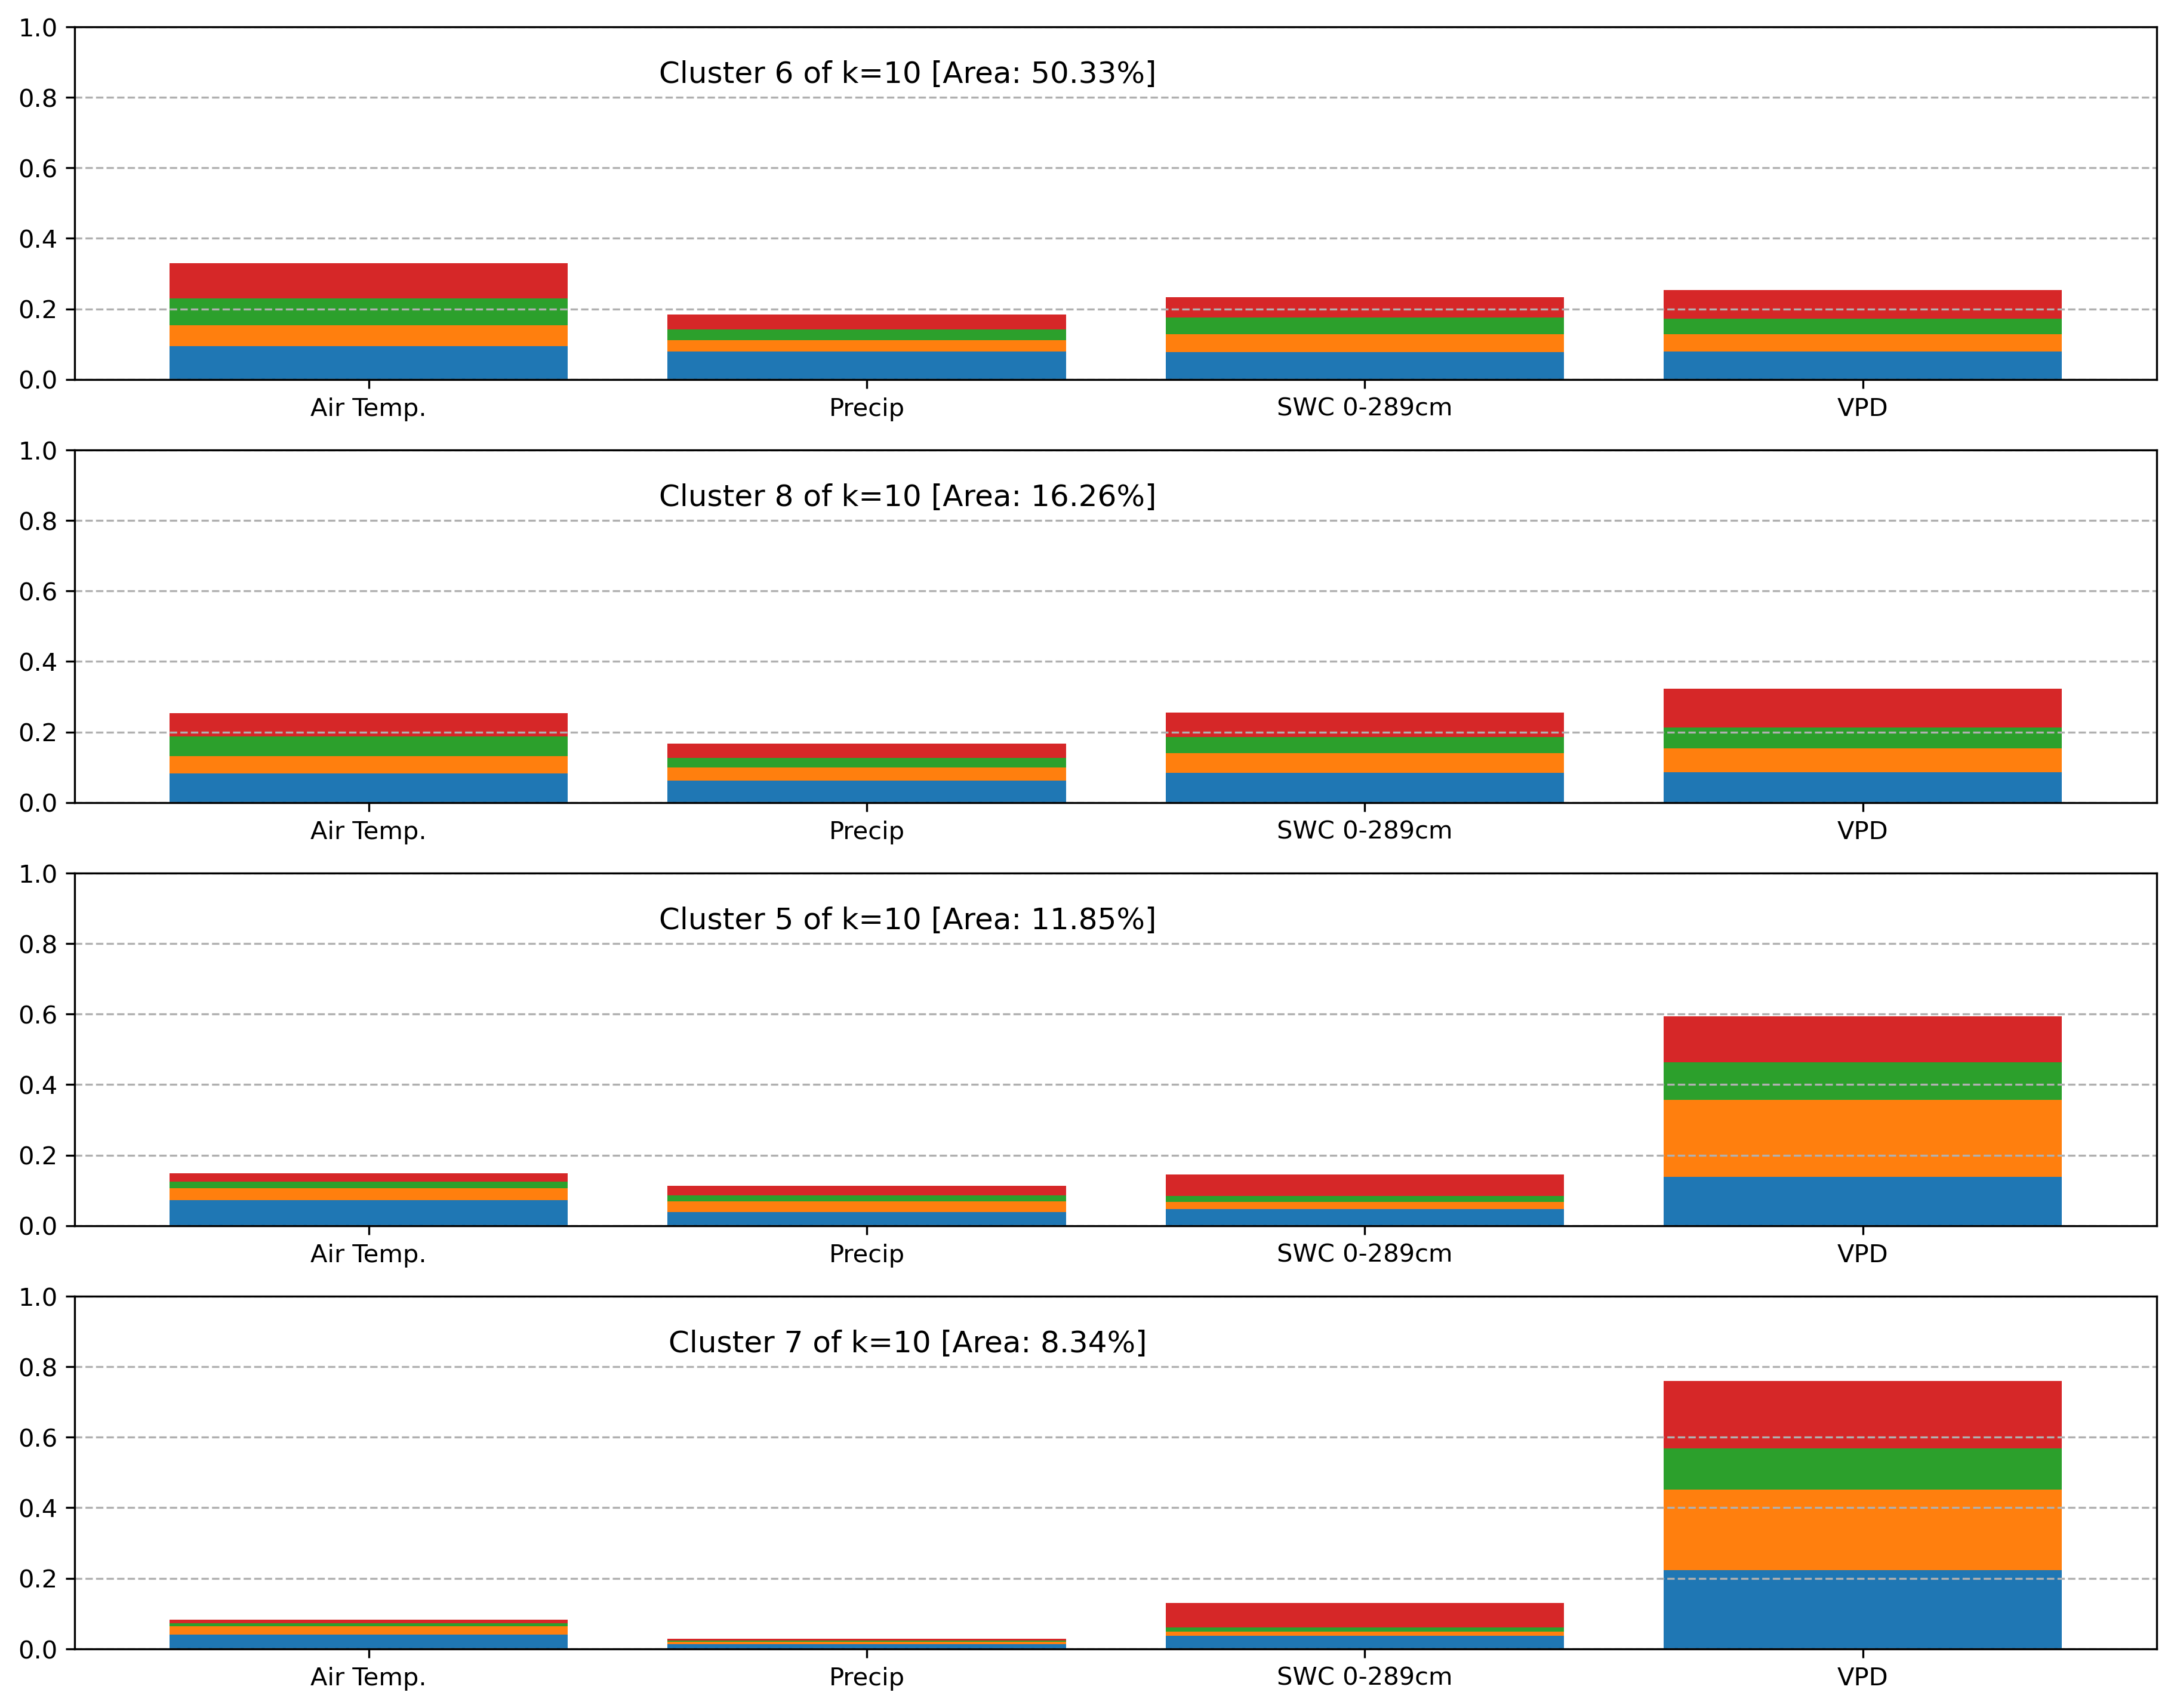

In [125]:
## Plot dominant driver distribution by cluster
#jbk@landscape:/data1/jbk/projects/climate/tropics/era5/shap_analysis$ r.stats -cnpl costa_rica_panama_interp.2017-2022.h10.mode
# 100%
#1  10115938 7.56%
#2  1096819 0.82%
#3  2641994 1.97%
#4  3828910 2.86%
#5  15862533 11.85%
#6  67370447 50.33%
#7  11168858 8.34%
#8  21766111 16.26%
#9  6510 0.00%
#10  133 0.00%

ncols=1
nrows=4
fig, ax = plt.subplots(nrows,ncols, figsize=(ncols*15, nrows*3), dpi=300)

#########################
# Cluster 6 of h10 50.33%
h10_6_0 = h10_6.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
h10_6_1 = h10_6.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
h10_6_2 = h10_6.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
h10_6_3 = h10_6.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
h10_6_0[7] = h10_6_0[2] + h10_6_0[3] + h10_6_0[4] + h10_6_0[5]
h10_6_1[7] = h10_6_1[2] + h10_6_1[3] + h10_6_1[4] + h10_6_1[5]
h10_6_2[7] = h10_6_2[2] + h10_6_2[3] + h10_6_2[4] + h10_6_2[5]
h10_6_3[7] = h10_6_3[2] + h10_6_3[3] + h10_6_3[4] + h10_6_3[5]

ax[0].bar(list(range(0,4)), h10_6_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[0].bar(list(range(0,4)), h10_6_1[[0,1,7,6]], bottom=h10_6_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[0].bar(list(range(0,4)), h10_6_2[[0,1,7,6]], bottom=h10_6_0[[0,1,7,6]] + h10_6_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[0].bar(list(range(0,4)), h10_6_3[[0,1,7,6]], bottom=h10_6_0[[0,1,7,6]] + h10_6_1[[0,1,7,6]] + h10_6_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[0].grid(axis='y', linestyle='--')
ax[0].set_xticks([0, 1, 2, 3])
ax[0].set_ylim([0,1])
ax[0].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[0].set_title("Cluster 6 of k=10 [Area: 50.33%]", x=0.4, y=0.8)

#########################
# Cluster 8 of h10 16.26%
h10_8_0 = h10_8.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
h10_8_1 = h10_8.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
h10_8_2 = h10_8.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
h10_8_3 = h10_8.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
h10_8_0[7] = h10_8_0[2] + h10_8_0[3] + h10_8_0[4] + h10_8_0[5]
h10_8_1[7] = h10_8_1[2] + h10_8_1[3] + h10_8_1[4] + h10_8_1[5]
h10_8_2[7] = h10_8_2[2] + h10_8_2[3] + h10_8_2[4] + h10_8_2[5]
h10_8_3[7] = h10_8_3[2] + h10_8_3[3] + h10_8_3[4] + h10_8_3[5]

ax[1].bar(list(range(0,4)), h10_8_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[1].bar(list(range(0,4)), h10_8_1[[0,1,7,6]], bottom=h10_8_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[1].bar(list(range(0,4)), h10_8_2[[0,1,7,6]], bottom=h10_8_0[[0,1,7,6]] + h10_8_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[1].bar(list(range(0,4)), h10_8_3[[0,1,7,6]], bottom=h10_8_0[[0,1,7,6]] + h10_8_1[[0,1,7,6]] + h10_8_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[1].grid(axis='y', linestyle='--')
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_ylim([0,1])
ax[1].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[1].set_title("Cluster 8 of k=10 [Area: 16.26%]", x=0.4, y=0.8)

#########################
# Cluster 5 of h10 11.85%
h10_5_0 = h10_5.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
h10_5_1 = h10_5.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
h10_5_2 = h10_5.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
h10_5_3 = h10_5.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
h10_5_0[7] = h10_5_0[2] + h10_5_0[3] + h10_5_0[4] + h10_5_0[5]
h10_5_1[7] = h10_5_1[2] + h10_5_1[3] + h10_5_1[4] + h10_5_1[5]
h10_5_2[7] = h10_5_2[2] + h10_5_2[3] + h10_5_2[4] + h10_5_2[5]
h10_5_3[7] = h10_5_3[2] + h10_5_3[3] + h10_5_3[4] + h10_5_3[5]

ax[2].bar(list(range(0,4)), h10_5_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[2].bar(list(range(0,4)), h10_5_1[[0,1,7,6]], bottom=h10_5_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[2].bar(list(range(0,4)), h10_5_2[[0,1,7,6]], bottom=h10_5_0[[0,1,7,6]] + h10_5_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[2].bar(list(range(0,4)), h10_5_3[[0,1,7,6]], bottom=h10_5_0[[0,1,7,6]] + h10_5_1[[0,1,7,6]] + h10_5_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[2].grid(axis='y', linestyle='--')
ax[2].set_xticks([0, 1, 2, 3])
ax[2].set_ylim([0,1])
ax[2].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[2].set_title("Cluster 5 of k=10 [Area: 11.85%]", x=0.4, y=0.8)

#########################
# Cluster 7 of h10 8.34%
h10_7_0 = h10_7.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
h10_7_1 = h10_7.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
h10_7_2 = h10_7.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
h10_7_3 = h10_7.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
h10_7_0[7] = h10_7_0[2] + h10_7_0[3] + h10_7_0[4] + h10_7_0[5]
h10_7_1[7] = h10_7_1[2] + h10_7_1[3] + h10_7_1[4] + h10_7_1[5]
h10_7_2[7] = h10_7_2[2] + h10_7_2[3] + h10_7_2[4] + h10_7_2[5]
h10_7_3[7] = h10_7_3[2] + h10_7_3[3] + h10_7_3[4] + h10_7_3[5]

ax[3].bar(list(range(0,4)), h10_7_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[3].bar(list(range(0,4)), h10_7_1[[0,1,7,6]], bottom=h10_7_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[3].bar(list(range(0,4)), h10_7_2[[0,1,7,6]], bottom=h10_7_0[[0,1,7,6]] + h10_7_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[3].bar(list(range(0,4)), h10_7_3[[0,1,7,6]], bottom=h10_7_0[[0,1,7,6]] + h10_7_1[[0,1,7,6]] + h10_7_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[3].grid(axis='y', linestyle='--')
ax[3].set_xticks([0, 1, 2, 3])
ax[3].set_ylim([0,1])
ax[3].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[3].set_title("Cluster 7 of k=10 [Area: 8.34%]", x=0.4, y=0.8)

plt.savefig('costa_rica_shap_h10_1.png', bbox_inches='tight', facecolor='white', transparent=False)



In [139]:
ht_10 = cr_stats[(cr_stats.height >= 0) & (cr_stats.height < 10)].groupby('shap1').count().shap2/cr_stats[(cr_stats.height >= 0) & (cr_stats.height < 10)].groupby('shap1').count().shap2.sum()
ht_20 = cr_stats[(cr_stats.height >= 10) & (cr_stats.height < 20)].groupby('shap1').count().shap2/cr_stats[(cr_stats.height >= 10) & (cr_stats.height < 20)].groupby('shap1').count().shap2.sum()
ht_60 = cr_stats[(cr_stats.height >= 20) & (cr_stats.height < 60)].groupby('shap1').count().shap2/cr_stats[(cr_stats.height >= 20) & (cr_stats.height < 60)].groupby('shap1').count().shap2.sum()


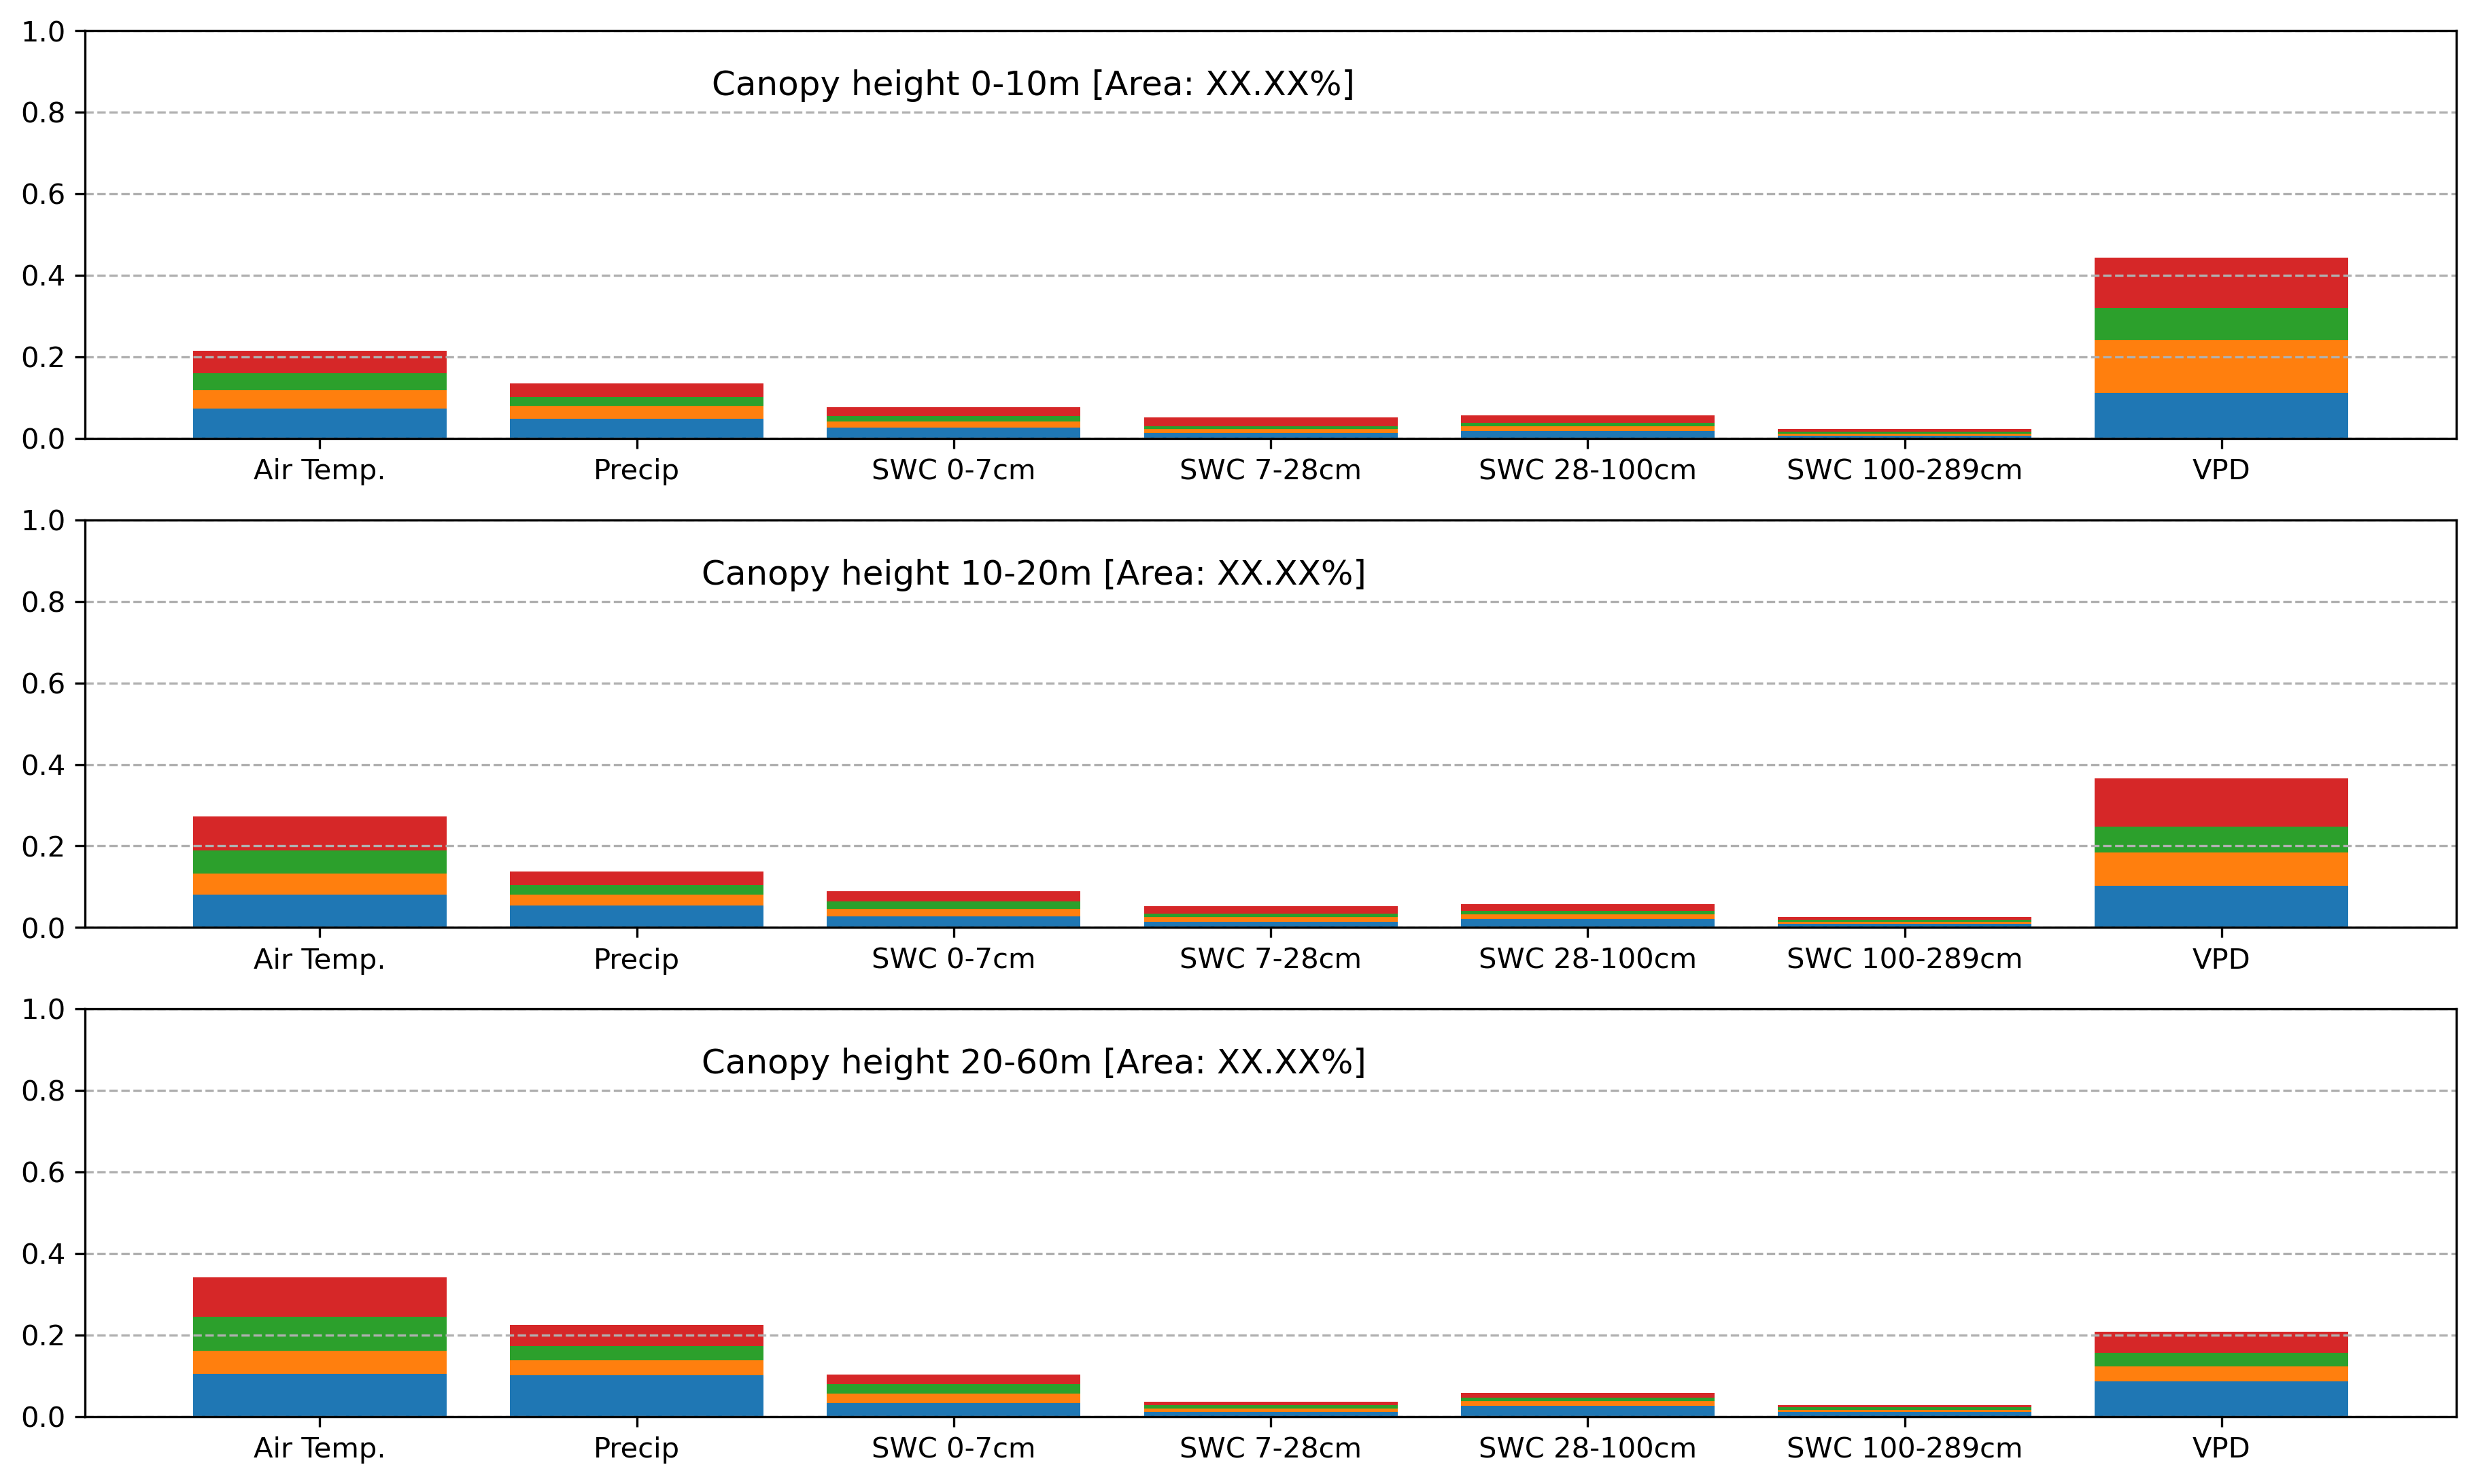

In [142]:
# Plot dominant drivers by canopy height bin

ncols=1
nrows=3
fig, ax = plt.subplots(nrows,ncols, figsize=(ncols*15, nrows*3), dpi=300)

#########################
# height 0-10
ht_10_0 = ht_10.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
ht_10_1 = ht_10.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
ht_10_2 = ht_10.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
ht_10_3 = ht_10.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

ax[0].bar(list(range(0,7)), ht_10_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[0].bar(list(range(0,7)), ht_10_1, bottom=ht_10_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[0].bar(list(range(0,7)), ht_10_2, bottom=ht_10_0 + ht_10_1) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[0].bar(list(range(0,7)), ht_10_3, bottom=ht_10_0 + ht_10_1 + ht_10_2) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[0].grid(axis='y', linestyle='--')
ax[0].set_xticks([0, 1, 2, 3, 4, 5, 6])
ax[0].set_ylim([0,1])
ax[0].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-7cm', 'SWC 7-28cm', 'SWC 28-100cm', 'SWC 100-289cm', 'VPD'])
ax[0].set_title("Canopy height 0-10m [Area: XX.XX%]", x=0.4, y=0.8)

#########################
# height 10-20
ht_20_0 = ht_20.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
ht_20_1 = ht_20.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
ht_20_2 = ht_20.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
ht_20_3 = ht_20.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

ax[1].bar(list(range(0,7)), ht_20_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[1].bar(list(range(0,7)), ht_20_1, bottom=ht_20_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[1].bar(list(range(0,7)), ht_20_2, bottom=ht_20_0 + ht_20_1) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[1].bar(list(range(0,7)), ht_20_3, bottom=ht_20_0 + ht_20_1 + ht_20_2) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[1].grid(axis='y', linestyle='--')
ax[1].set_xticks([0, 1, 2, 3, 4, 5, 6])
ax[1].set_ylim([0,1])
ax[1].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-7cm', 'SWC 7-28cm', 'SWC 28-100cm', 'SWC 100-289cm', 'VPD'])
ax[1].set_title("Canopy height 10-20m [Area: XX.XX%]", x=0.4, y=0.8)

#########################
# height 20-60
ht_60_0 = ht_60.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
ht_60_1 = ht_60.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
ht_60_2 = ht_60.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
ht_60_3 = ht_60.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

ax[2].bar(list(range(0,7)), ht_60_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[2].bar(list(range(0,7)), ht_60_1, bottom=ht_60_0) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[2].bar(list(range(0,7)), ht_60_2, bottom=ht_60_0 + ht_60_1) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[2].bar(list(range(0,7)), ht_60_3, bottom=ht_60_0 + ht_60_1 + ht_60_2) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[2].grid(axis='y', linestyle='--')
ax[2].set_xticks([0, 1, 2, 3, 4, 5, 6])
ax[2].set_ylim([0,1])
ax[2].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-7cm', 'SWC 7-28cm', 'SWC 28-100cm', 'SWC 100-289cm', 'VPD'])
ax[2].set_title("Canopy height 20-60m [Area: XX.XX%]", x=0.4, y=0.8)

plt.savefig('costa_rica_shap_canopyheight.png', bbox_inches='tight', facecolor='white', transparent=False)


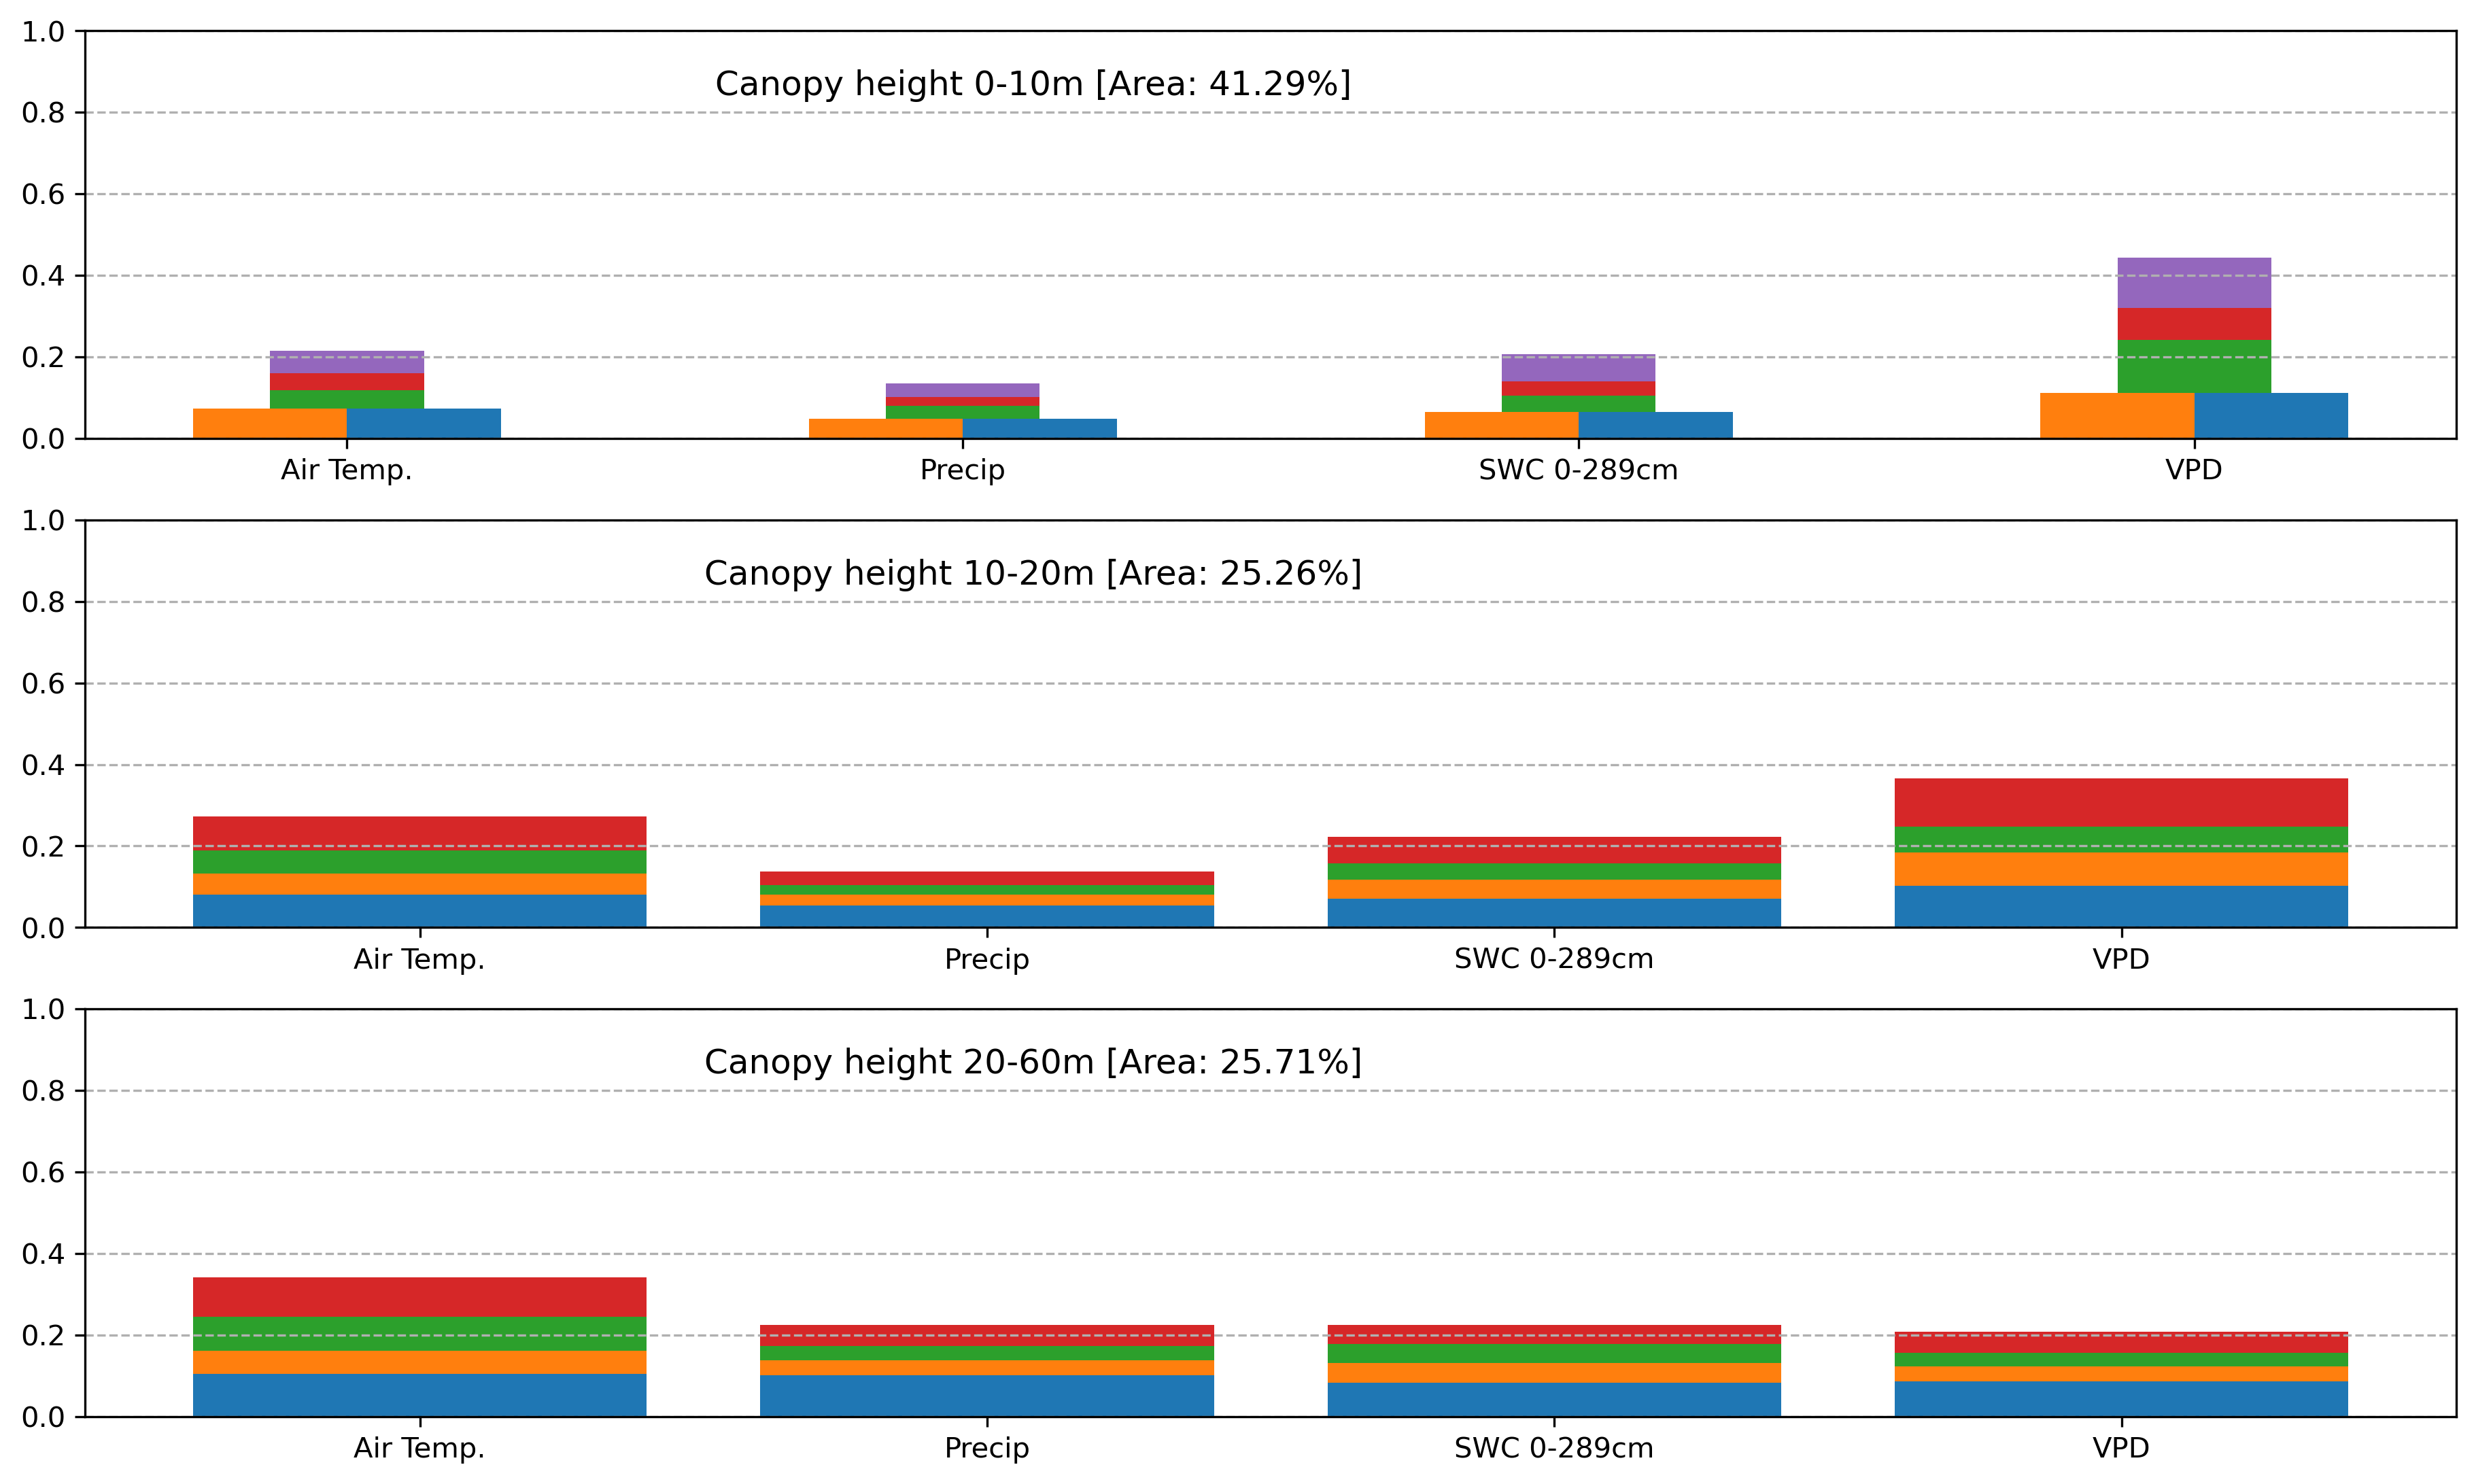

In [170]:
# Plot dominant drivers by canopy height bin

ncols=1
nrows=3
fig, ax = plt.subplots(nrows,ncols, figsize=(ncols*15, nrows*3), dpi=300)
width = 0.25

#########################
# height 0-10
ht_10_0 = ht_10.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
ht_10_1 = ht_10.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
ht_10_2 = ht_10.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
ht_10_3 = ht_10.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
ht_10_0[7] = ht_10_0[2] + ht_10_0[3] + ht_10_0[4] + ht_10_0[5]
ht_10_1[7] = ht_10_1[2] + ht_10_1[3] + ht_10_1[4] + ht_10_1[5]
ht_10_2[7] = ht_10_2[2] + ht_10_2[3] + ht_10_2[4] + ht_10_2[5]
ht_10_3[7] = ht_10_3[2] + ht_10_3[3] + ht_10_3[4] + ht_10_3[5]

ax[0].bar(np.arange(4)+width/2, ht_10_0[[0,1,7,6]], width = width, label='Second Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])

ax[0].bar(np.arange(4)-width/2, ht_10_0[[0,1,7,6]], width = width, label='First Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[0].bar(np.arange(4), ht_10_1[[0,1,7,6]], width = width, bottom=ht_10_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[0].bar(np.arange(4), ht_10_2[[0,1,7,6]], width = width, bottom=ht_10_0[[0,1,7,6]] + ht_10_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[0].bar(np.arange(4), ht_10_3[[0,1,7,6]], width = width, bottom=ht_10_0[[0,1,7,6]] + ht_10_1[[0,1,7,6]] + ht_10_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[0].grid(axis='y', linestyle='--')
ax[0].set_xticks([0, 1, 2, 3])
ax[0].set_ylim([0,1])
ax[0].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[0].set_title("Canopy height 0-10m [Area: 41.29%]", x=0.4, y=0.8)

#########################
# height 10-20
ht_20_0 = ht_20.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
ht_20_1 = ht_20.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
ht_20_2 = ht_20.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
ht_20_3 = ht_20.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
ht_20_0[7] = ht_20_0[2] + ht_20_0[3] + ht_20_0[4] + ht_20_0[5]
ht_20_1[7] = ht_20_1[2] + ht_20_1[3] + ht_20_1[4] + ht_20_1[5]
ht_20_2[7] = ht_20_2[2] + ht_20_2[3] + ht_20_2[4] + ht_20_2[5]
ht_20_3[7] = ht_20_3[2] + ht_20_3[3] + ht_20_3[4] + ht_20_3[5]

ax[1].bar(np.arange(4), ht_20_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[1].bar(np.arange(4), ht_20_1[[0,1,7,6]], bottom=ht_20_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[1].bar(np.arange(4), ht_20_2[[0,1,7,6]], bottom=ht_20_0[[0,1,7,6]] + ht_20_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[1].bar(np.arange(4), ht_20_3[[0,1,7,6]], bottom=ht_20_0[[0,1,7,6]] + ht_20_1[[0,1,7,6]] + ht_20_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[1].grid(axis='y', linestyle='--')
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_ylim([0,1])
ax[1].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[1].set_title("Canopy height 10-20m [Area: 25.26%]", x=0.4, y=0.8)

#########################
# height 20-60
ht_60_0 = ht_60.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
ht_60_1 = ht_60.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
ht_60_2 = ht_60.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
ht_60_3 = ht_60.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

# Sum SWC at all depths
ht_60_0[7] = ht_60_0[2] + ht_60_0[3] + ht_60_0[4] + ht_60_0[5]
ht_60_1[7] = ht_60_1[2] + ht_60_1[3] + ht_60_1[4] + ht_60_1[5]
ht_60_2[7] = ht_60_2[2] + ht_60_2[3] + ht_60_2[4] + ht_60_2[5]
ht_60_3[7] = ht_60_3[2] + ht_60_3[3] + ht_60_3[4] + ht_60_3[5]

ax[2].bar(np.arange(4), ht_60_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
ax[2].bar(np.arange(4), ht_60_1[[0,1,7,6]], bottom=ht_60_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
ax[2].bar(np.arange(4), ht_60_2[[0,1,7,6]], bottom=ht_60_0[[0,1,7,6]] + ht_60_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
ax[2].bar(np.arange(4), ht_60_3[[0,1,7,6]], bottom=ht_60_0[[0,1,7,6]] + ht_60_1[[0,1,7,6]] + ht_60_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])

ax[2].grid(axis='y', linestyle='--')
ax[2].set_xticks([0, 1, 2, 3])
ax[2].set_ylim([0,1])
ax[2].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
ax[2].set_title("Canopy height 20-60m [Area: 25.71%]", x=0.4, y=0.8)

plt.savefig('costa_rica_shap_canopyheight_1.png', bbox_inches='tight', facecolor='white', transparent=False)


In [171]:
np.arange(4)

array([0, 1, 2, 3])

In [172]:
def plot_dominant_three_by_height(cr_stats):
    # first dominant
    ht1_10 = cr_stats[(cr_stats.height >= 0) & (cr_stats.height < 10)].groupby('shap1').count().lat/cr_stats[(cr_stats.height >= 0) & (cr_stats.height < 10)].groupby('shap1').count().lat.sum()
    ht1_20 = cr_stats[(cr_stats.height >= 10) & (cr_stats.height < 20)].groupby('shap1').count().lat/cr_stats[(cr_stats.height >= 10) & (cr_stats.height < 20)].groupby('shap1').count().lat.sum()
    ht1_60 = cr_stats[(cr_stats.height >= 20) & (cr_stats.height < 60)].groupby('shap1').count().lat/cr_stats[(cr_stats.height >= 20) & (cr_stats.height < 60)].groupby('shap1').count().lat.sum()
    # second dominant 
    ht2_10 = cr_stats[(cr_stats.height >= 0) & (cr_stats.height < 10)].groupby('shap2').count().lat/cr_stats[(cr_stats.height >= 0) & (cr_stats.height < 10)].groupby('shap2').count().lat.sum()
    ht2_20 = cr_stats[(cr_stats.height >= 10) & (cr_stats.height < 20)].groupby('shap2').count().lat/cr_stats[(cr_stats.height >= 10) & (cr_stats.height < 20)].groupby('shap2').count().lat.sum()
    ht2_60 = cr_stats[(cr_stats.height >= 20) & (cr_stats.height < 60)].groupby('shap2').count().lat/cr_stats[(cr_stats.height >= 20) & (cr_stats.height < 60)].groupby('shap2').count().lat.sum()
    # third dominant
    ht3_10 = cr_stats[(cr_stats.height >= 0) & (cr_stats.height < 10)].groupby('shap1').count().lat/cr_stats[(cr_stats.height >= 0) & (cr_stats.height < 10)].groupby('shap3').count().lat.sum()
    ht3_20 = cr_stats[(cr_stats.height >= 10) & (cr_stats.height < 20)].groupby('shap1').count().lat/cr_stats[(cr_stats.height >= 10) & (cr_stats.height < 20)].groupby('shap3').count().lat.sum()
    ht3_60 = cr_stats[(cr_stats.height >= 20) & (cr_stats.height < 60)].groupby('shap1').count().lat/cr_stats[(cr_stats.height >= 20) & (cr_stats.height < 60)].groupby('shap3').count().lat.sum()

    # Plot the distribution of three dominants
    # Plot dominant drivers by canopy height bin

    ncols=1
    nrows=3
    fig, ax = plt.subplots(nrows,ncols, figsize=(ncols*15, nrows*3), dpi=300)
    width = 0.25

    #########################
    # height 0-10
    ht1_10_0 = ht1_10.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    ht1_10_1 = ht1_10.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    ht1_10_2 = ht1_10.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    ht1_10_3 = ht1_10.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    ht2_10_0 = ht2_10.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    ht2_10_1 = ht2_10.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    ht2_10_2 = ht2_10.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    ht2_10_3 = ht2_10.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    ht3_10_0 = ht3_10.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    ht3_10_1 = ht3_10.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    ht3_10_2 = ht3_10.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    ht3_10_3 = ht3_10.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    # Sum SWC at all depths
    ht1_10_0[7] = ht1_10_0[2] + ht1_10_0[3] + ht1_10_0[4] + ht1_10_0[5]
    ht1_10_1[7] = ht1_10_1[2] + ht1_10_1[3] + ht1_10_1[4] + ht1_10_1[5]
    ht1_10_2[7] = ht1_10_2[2] + ht1_10_2[3] + ht1_10_2[4] + ht1_10_2[5]
    ht1_10_3[7] = ht1_10_3[2] + ht1_10_3[3] + ht1_10_3[4] + ht1_10_3[5]

    ht2_10_0[7] = ht2_10_0[2] + ht2_10_0[3] + ht2_10_0[4] + ht2_10_0[5]
    ht2_10_1[7] = ht2_10_1[2] + ht2_10_1[3] + ht2_10_1[4] + ht2_10_1[5]
    ht2_10_2[7] = ht2_10_2[2] + ht2_10_2[3] + ht2_10_2[4] + ht2_10_2[5]
    ht2_10_3[7] = ht2_10_3[2] + ht2_10_3[3] + ht2_10_3[4] + ht2_10_3[5]

    ht3_10_0[7] = ht3_10_0[2] + ht3_10_0[3] + ht3_10_0[4] + ht3_10_0[5]
    ht3_10_1[7] = ht3_10_1[2] + ht3_10_1[3] + ht3_10_1[4] + ht3_10_1[5]
    ht3_10_2[7] = ht3_10_2[2] + ht3_10_2[3] + ht3_10_2[4] + ht3_10_2[5]
    ht3_10_3[7] = ht3_10_3[2] + ht3_10_3[3] + ht3_10_3[4] + ht3_10_3[5]

    # first dominant
    ax[0].bar(np.arange(4)-width/2, ht1_10_0[[0,1,7,6]], width = width, label='First Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[0].bar(np.arange(4)-width/2, ht1_10_1[[0,1,7,6]], width = width, bottom=ht1_10_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[0].bar(np.arange(4)-width/2, ht1_10_2[[0,1,7,6]], width = width, bottom=ht1_10_0[[0,1,7,6]] + ht1_10_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[0].bar(np.arange(4)-width/2, ht1_10_3[[0,1,7,6]], width = width, bottom=ht1_10_0[[0,1,7,6]] + ht1_10_1[[0,1,7,6]] + ht1_10_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # second dominant
    ax[0].bar(np.arange(4)+width/2, ht2_10_0[[0,1,7,6]], width = width, label='Second Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[0].bar(np.arange(4)+width/2, ht2_10_1[[0,1,7,6]], width = width, bottom=ht2_10_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[0].bar(np.arange(4)+width/2, ht2_10_2[[0,1,7,6]], width = width, bottom=ht2_10_0[[0,1,7,6]] + ht2_10_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[0].bar(np.arange(4)+width/2, ht2_10_3[[0,1,7,6]], width = width, bottom=ht2_10_0[[0,1,7,6]] + ht2_10_1[[0,1,7,6]] + ht2_10_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # third dominant
    ax[0].bar(np.arange(4)+width*1.5, ht3_10_0[[0,1,7,6]], width = width, label='Third Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[0].bar(np.arange(4)+width*1.5, ht3_10_1[[0,1,7,6]], width = width, bottom=ht3_10_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[0].bar(np.arange(4)+width*1.5, ht3_10_2[[0,1,7,6]], width = width, bottom=ht3_10_0[[0,1,7,6]] + ht3_10_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[0].bar(np.arange(4)+width*1.5, ht3_10_3[[0,1,7,6]], width = width, bottom=ht3_10_0[[0,1,7,6]] + ht3_10_1[[0,1,7,6]] + ht3_10_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    
    ax[0].grid(axis='y', linestyle='--')
    ax[0].set_xticks([0, 1, 2, 3])
    ax[0].set_ylim([0,1])
    ax[0].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
    ax[0].set_title("Canopy height 0-10m [Area: 41.29%]", x=0.4, y=0.8)

    #########################
    # height 10-20
    ht1_20_0 = ht1_20.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    ht1_20_1 = ht1_20.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    ht1_20_2 = ht1_20.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    ht1_20_3 = ht1_20.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    ht2_20_0 = ht2_20.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    ht2_20_1 = ht2_20.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    ht2_20_2 = ht2_20.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    ht2_20_3 = ht2_20.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    ht3_20_0 = ht3_20.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    ht3_20_1 = ht3_20.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    ht3_20_2 = ht3_20.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    ht3_20_3 = ht3_20.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    # Sum SWC at all depths
    ht1_20_0[7] = ht1_20_0[2] + ht1_20_0[3] + ht1_20_0[4] + ht1_20_0[5]
    ht1_20_1[7] = ht1_20_1[2] + ht1_20_1[3] + ht1_20_1[4] + ht1_20_1[5]
    ht1_20_2[7] = ht1_20_2[2] + ht1_20_2[3] + ht1_20_2[4] + ht1_20_2[5]
    ht1_20_3[7] = ht1_20_3[2] + ht1_20_3[3] + ht1_20_3[4] + ht1_20_3[5]

    ht2_20_0[7] = ht2_20_0[2] + ht2_20_0[3] + ht2_20_0[4] + ht2_20_0[5]
    ht2_20_1[7] = ht2_20_1[2] + ht2_20_1[3] + ht2_20_1[4] + ht2_20_1[5]
    ht2_20_2[7] = ht2_20_2[2] + ht2_20_2[3] + ht2_20_2[4] + ht2_20_2[5]
    ht2_20_3[7] = ht2_20_3[2] + ht2_20_3[3] + ht2_20_3[4] + ht2_20_3[5]

    ht3_20_0[7] = ht3_20_0[2] + ht3_20_0[3] + ht3_20_0[4] + ht3_20_0[5]
    ht3_20_1[7] = ht3_20_1[2] + ht3_20_1[3] + ht3_20_1[4] + ht3_20_1[5]
    ht3_20_2[7] = ht3_20_2[2] + ht3_20_2[3] + ht3_20_2[4] + ht3_20_2[5]
    ht3_20_3[7] = ht3_20_3[2] + ht3_20_3[3] + ht3_20_3[4] + ht3_20_3[5]

    # first dominant
    ax[1].bar(np.arange(4)-width/2, ht1_20_0[[0,1,7,6]], width = width, label='First Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[1].bar(np.arange(4)-width/2, ht1_20_1[[0,1,7,6]], width = width, bottom=ht1_20_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[1].bar(np.arange(4)-width/2, ht1_20_2[[0,1,7,6]], width = width, bottom=ht1_20_0[[0,1,7,6]] + ht1_20_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[1].bar(np.arange(4)-width/2, ht1_20_3[[0,1,7,6]], width = width, bottom=ht1_20_0[[0,1,7,6]] + ht1_20_1[[0,1,7,6]] + ht1_20_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # second dominant
    ax[1].bar(np.arange(4)+width/2, ht2_20_0[[0,1,7,6]], width = width, label='Second Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[1].bar(np.arange(4)+width/2, ht2_20_1[[0,1,7,6]], width = width, bottom=ht2_20_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[1].bar(np.arange(4)+width/2, ht2_20_2[[0,1,7,6]], width = width, bottom=ht2_20_0[[0,1,7,6]] + ht2_20_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[1].bar(np.arange(4)+width/2, ht2_20_3[[0,1,7,6]], width = width, bottom=ht2_20_0[[0,1,7,6]] + ht2_20_1[[0,1,7,6]] + ht2_20_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # third dominant
    ax[1].bar(np.arange(4)+width*1.5, ht3_20_0[[0,1,7,6]], width = width, label='Third Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[1].bar(np.arange(4)+width*1.5, ht3_20_1[[0,1,7,6]], width = width, bottom=ht3_20_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[1].bar(np.arange(4)+width*1.5, ht3_20_2[[0,1,7,6]], width = width, bottom=ht3_20_0[[0,1,7,6]] + ht3_20_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[1].bar(np.arange(4)+width*1.5, ht3_20_3[[0,1,7,6]], width = width, bottom=ht3_20_0[[0,1,7,6]] + ht3_20_1[[0,1,7,6]] + ht3_20_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    
    
    ax[1].grid(axis='y', linestyle='--')
    ax[1].set_xticks([0, 1, 2, 3])
    ax[1].set_ylim([0,1])
    ax[1].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
    ax[1].set_title("Canopy height 10-20m [Area: 25.26%]", x=0.4, y=0.8)

    #########################
    # height 20-60
    ht1_60_0 = ht1_60.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    ht1_60_1 = ht1_60.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    ht1_60_2 = ht1_60.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    ht1_60_3 = ht1_60.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    ht2_60_0 = ht2_60.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    ht2_60_1 = ht2_60.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    ht2_60_2 = ht2_60.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    ht2_60_3 = ht2_60.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    ht3_60_0 = ht3_60.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    ht3_60_1 = ht3_60.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    ht3_60_2 = ht3_60.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    ht3_60_3 = ht3_60.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    # Sum SWC at all depths
    ht1_60_0[7] = ht1_60_0[2] + ht1_60_0[3] + ht1_60_0[4] + ht1_60_0[5]
    ht1_60_1[7] = ht1_60_1[2] + ht1_60_1[3] + ht1_60_1[4] + ht1_60_1[5]
    ht1_60_2[7] = ht1_60_2[2] + ht1_60_2[3] + ht1_60_2[4] + ht1_60_2[5]
    ht1_60_3[7] = ht1_60_3[2] + ht1_60_3[3] + ht1_60_3[4] + ht1_60_3[5]

    ht2_60_0[7] = ht2_60_0[2] + ht2_60_0[3] + ht2_60_0[4] + ht2_60_0[5]
    ht2_60_1[7] = ht2_60_1[2] + ht2_60_1[3] + ht2_60_1[4] + ht2_60_1[5]
    ht2_60_2[7] = ht2_60_2[2] + ht2_60_2[3] + ht2_60_2[4] + ht2_60_2[5]
    ht2_60_3[7] = ht2_60_3[2] + ht2_60_3[3] + ht2_60_3[4] + ht2_60_3[5]

    ht3_60_0[7] = ht3_60_0[2] + ht3_60_0[3] + ht3_60_0[4] + ht3_60_0[5]
    ht3_60_1[7] = ht3_60_1[2] + ht3_60_1[3] + ht3_60_1[4] + ht3_60_1[5]
    ht3_60_2[7] = ht3_60_2[2] + ht3_60_2[3] + ht3_60_2[4] + ht3_60_2[5]
    ht3_60_3[7] = ht3_60_3[2] + ht3_60_3[3] + ht3_60_3[4] + ht3_60_3[5]

    # first dominant
    ax[2].bar(np.arange(4)-width/2, ht1_60_0[[0,1,7,6]], width = width, label='First Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[2].bar(np.arange(4)-width/2, ht1_60_1[[0,1,7,6]], width = width, bottom=ht1_60_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[2].bar(np.arange(4)-width/2, ht1_60_2[[0,1,7,6]], width = width, bottom=ht1_60_0[[0,1,7,6]] + ht1_60_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[2].bar(np.arange(4)-width/2, ht1_60_3[[0,1,7,6]], width = width, bottom=ht1_60_0[[0,1,7,6]] + ht1_60_1[[0,1,7,6]] + ht1_60_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # second dominant
    ax[2].bar(np.arange(4)+width/2, ht2_60_0[[0,1,7,6]], width = width, label='Second Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[2].bar(np.arange(4)+width/2, ht2_60_1[[0,1,7,6]], width = width, bottom=ht2_60_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[2].bar(np.arange(4)+width/2, ht2_60_2[[0,1,7,6]], width = width, bottom=ht2_60_0[[0,1,7,6]] + ht2_60_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[2].bar(np.arange(4)+width/2, ht2_60_3[[0,1,7,6]], width = width, bottom=ht2_60_0[[0,1,7,6]] + ht2_60_1[[0,1,7,6]] + ht2_60_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # third dominant
    ax[2].bar(np.arange(4)+width*1.5, ht3_60_0[[0,1,7,6]], width = width, label='Third Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[2].bar(np.arange(4)+width*1.5, ht3_60_1[[0,1,7,6]], width = width, bottom=ht3_60_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[2].bar(np.arange(4)+width*1.5, ht3_60_2[[0,1,7,6]], width = width, bottom=ht3_60_0[[0,1,7,6]] + ht3_60_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[2].bar(np.arange(4)+width*1.5, ht3_60_3[[0,1,7,6]], width = width, bottom=ht3_60_0[[0,1,7,6]] + ht3_60_1[[0,1,7,6]] + ht3_60_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    
    ax[2].grid(axis='y', linestyle='--')
    ax[2].set_xticks([0, 1, 2, 3])
    ax[2].set_ylim([0,1])
    ax[2].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
    ax[2].set_title("Canopy height 20-60m [Area: 25.71%]", x=0.4, y=0.8)
    
    plt.savefig('costa_rica_shap_canopyheight_1_threedominants.png', bbox_inches='tight', facecolor='white', transparent=False)


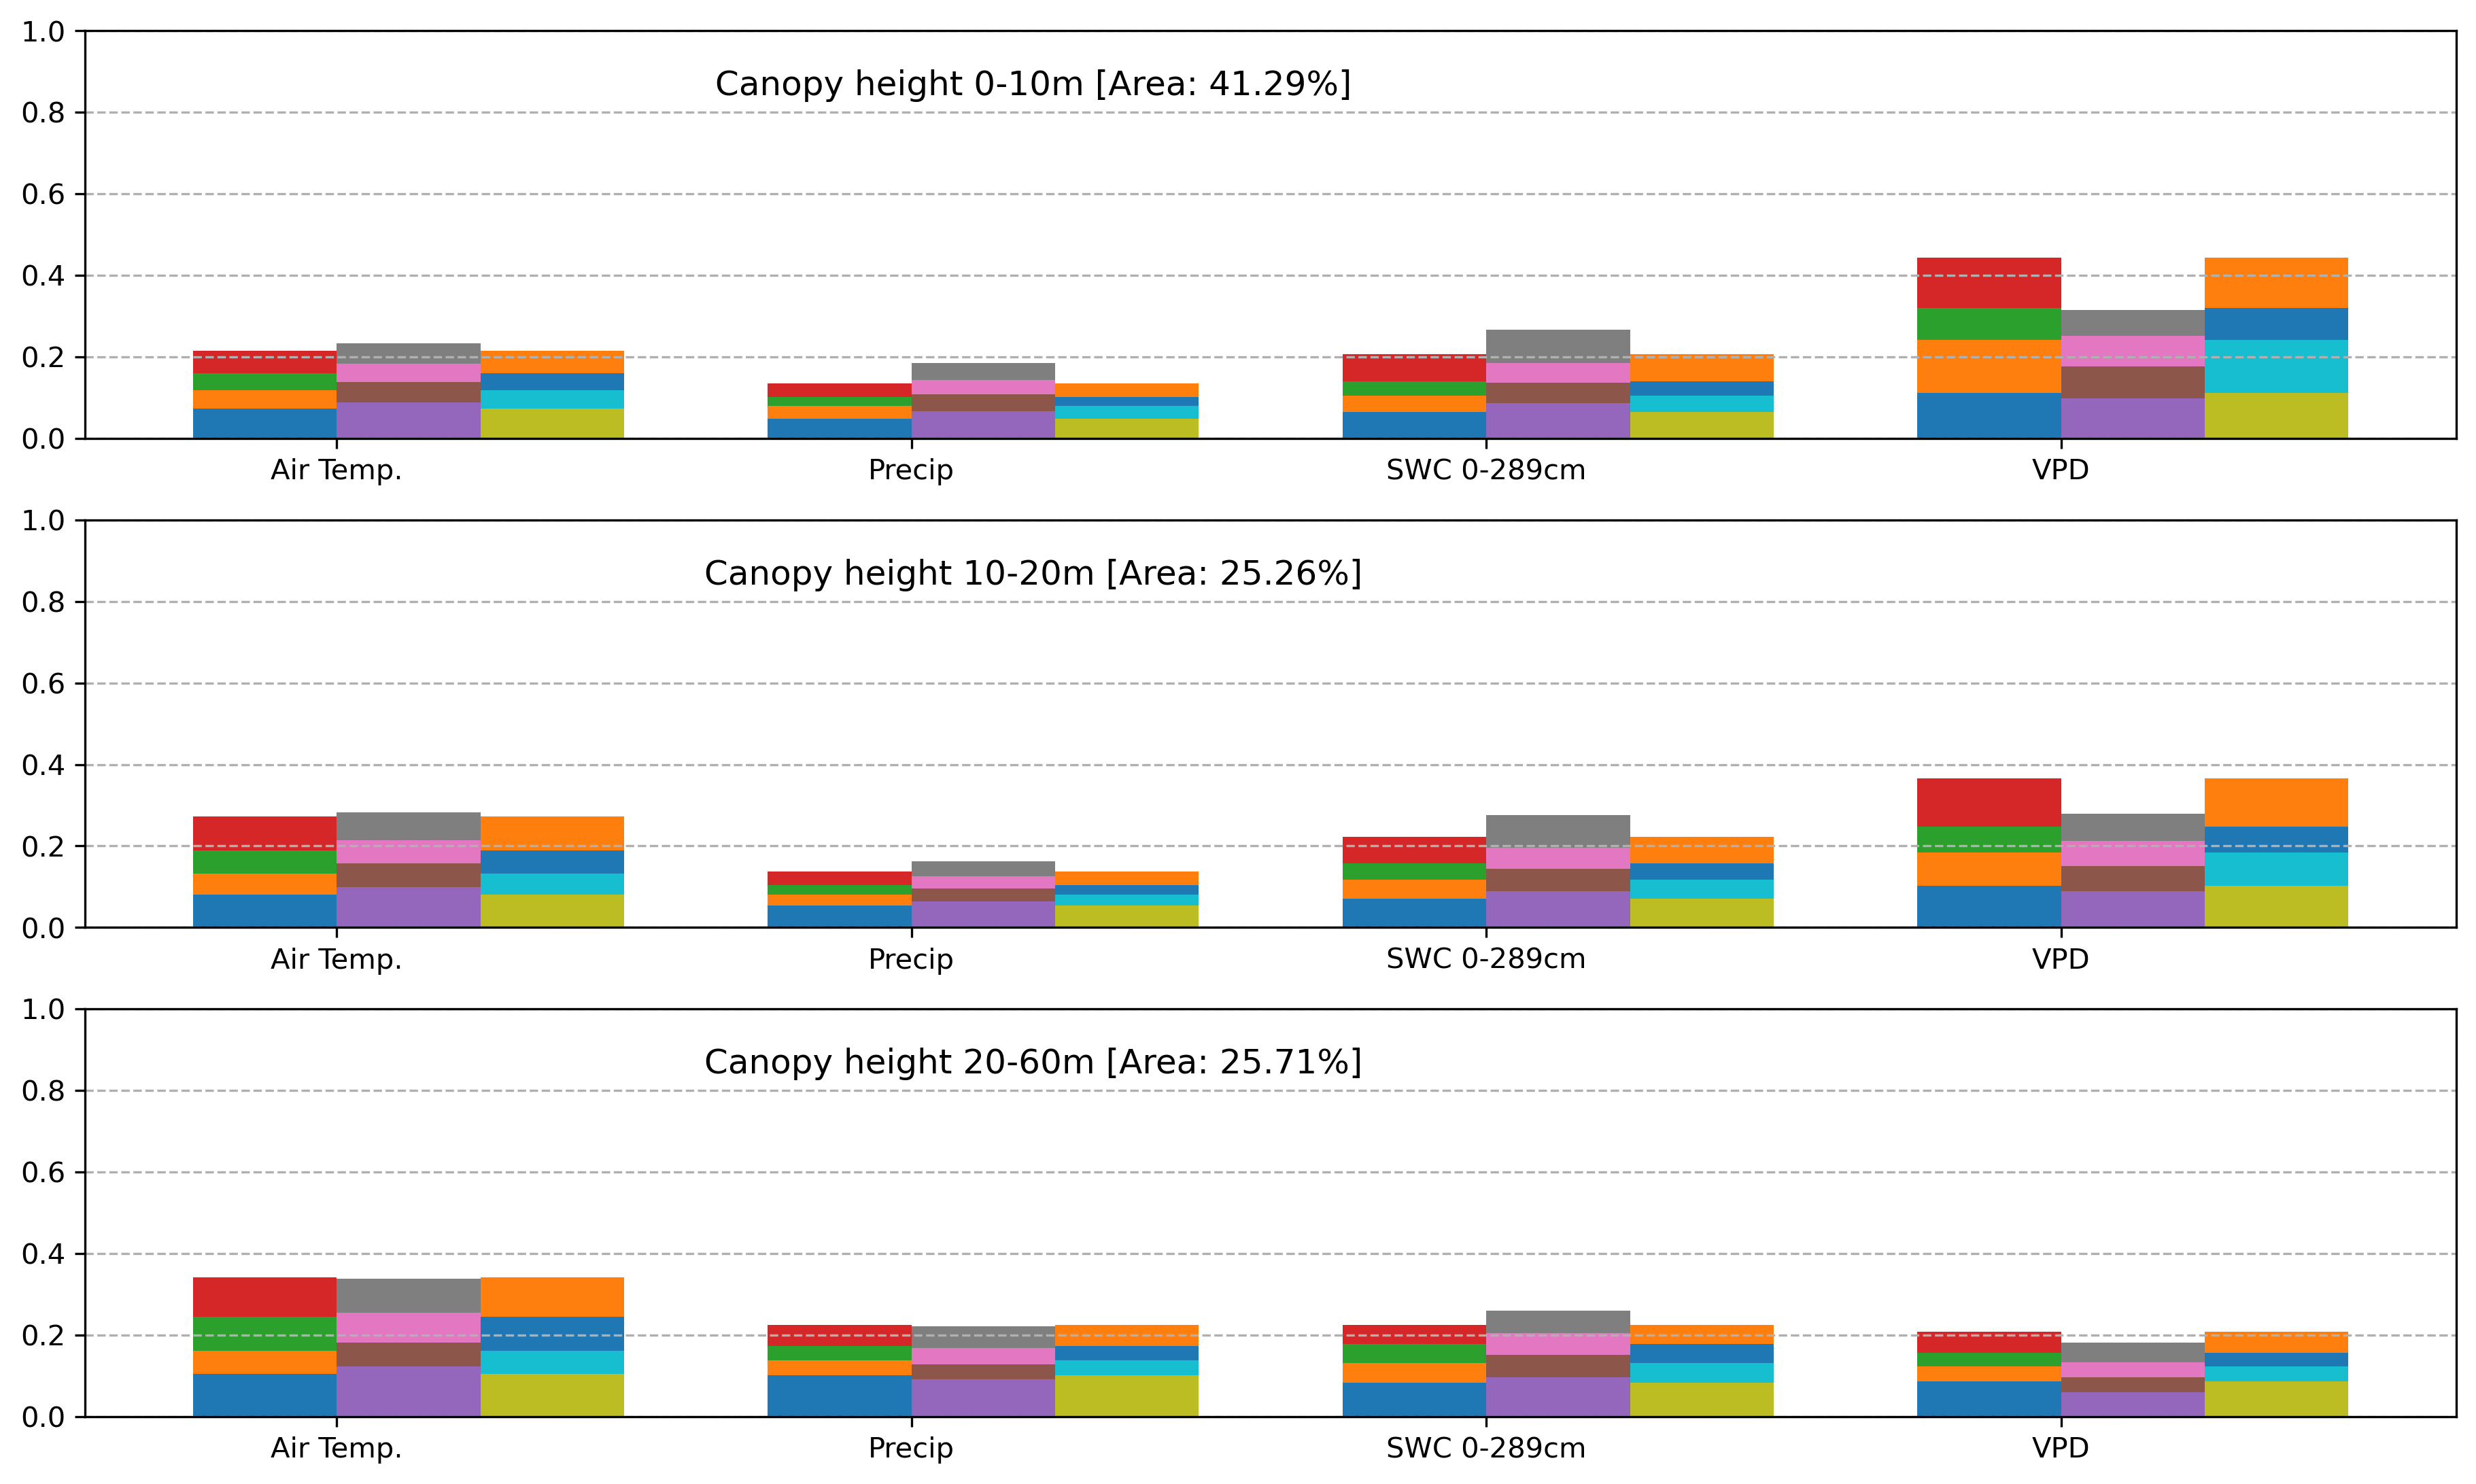

In [173]:
plot_dominant_three_by_height(cr_stats)

In [167]:
print(cr_stats.shape)
#ht1_10 = cr_stats[(cr_stats.height >= 0) & (cr_stats.height < 10)]
print(cr_stats[(cr_stats.height >= 0) & (cr_stats.height < 10)].shape)
print(cr_stats[(cr_stats.height >= 10) & (cr_stats.height < 20)].shape)
print(cr_stats[(cr_stats.height >= 20) & (cr_stats.height < 60)].shape)

(133858253, 10)
(55269878, 10)
(33819845, 10)
(34415104, 10)


In [169]:
print(55269878*100.0/133858253)
print(33819845*100.0/133858253)
print(34415104*100.0/133858253)


41.289854574749306
25.265416395356663
25.710109932482087


In [34]:
def plot_dominant_three_by_treeden(cr_stats):
    # first dominant
    td1_25 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.min() ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.25))].groupby('shap1').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.min()) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.25))].groupby('shap1').count().lat.sum()
    td1_50 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.25) ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.50))].groupby('shap1').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.25)) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.50))].groupby('shap1').count().lat.sum()
    td1_75 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.50) ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.75))].groupby('shap1').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.50)) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.75))].groupby('shap1').count().lat.sum()
    td1_100 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.75) ) & (cr_stats.treeden < cr_stats.treeden.max())].groupby('shap1').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.75)) & (cr_stats.treeden < cr_stats.treeden.max())].groupby('shap1').count().lat.sum()
    # second dominant 
    td2_25 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.min() ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.25))].groupby('shap2').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.min()) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.25))].groupby('shap2').count().lat.sum()
    td2_50 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.25) ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.50))].groupby('shap2').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.25)) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.50))].groupby('shap2').count().lat.sum()
    td2_75 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.50) ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.75))].groupby('shap2').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.50)) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.75))].groupby('shap2').count().lat.sum()
    td2_100 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.75) ) & (cr_stats.treeden < cr_stats.treeden.max())].groupby('shap2').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.75)) & (cr_stats.treeden < cr_stats.treeden.max())].groupby('shap2').count().lat.sum()
    # third dominant
    td3_25 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.min() ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.25))].groupby('shap3').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.min()) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.25))].groupby('shap3').count().lat.sum()
    td3_50 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.25) ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.50))].groupby('shap3').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.25)) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.50))].groupby('shap3').count().lat.sum()
    td3_75 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.50) ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.75))].groupby('shap3').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.50)) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.75))].groupby('shap3').count().lat.sum()
    td3_100 = cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.75) ) & (cr_stats.treeden < cr_stats.treeden.max())].groupby('shap3').count().lat/cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.75)) & (cr_stats.treeden < cr_stats.treeden.max())].groupby('shap3').count().lat.sum()

    # Plot the distribution of three dominants
    # Plot dominant drivers by canopy height bin

    ncols=1
    nrows=4
    fig, ax = plt.subplots(nrows,ncols, figsize=(ncols*15, nrows*3), dpi=300)
    width = 0.25

    #########################
    # tree density 0-25 percentile
    td1_25_0 = td1_25.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td1_25_1 = td1_25.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td1_25_2 = td1_25.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td1_25_3 = td1_25.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    td2_25_0 = td2_25.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td2_25_1 = td2_25.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td2_25_2 = td2_25.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td2_25_3 = td2_25.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    td3_25_0 = td3_25.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td3_25_1 = td3_25.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td3_25_2 = td3_25.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td3_25_3 = td3_25.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    # Sum SWC at all depths
    td1_25_0[7] = td1_25_0[2] + td1_25_0[3] + td1_25_0[4] + td1_25_0[5]
    td1_25_1[7] = td1_25_1[2] + td1_25_1[3] + td1_25_1[4] + td1_25_1[5]
    td1_25_2[7] = td1_25_2[2] + td1_25_2[3] + td1_25_2[4] + td1_25_2[5]
    td1_25_3[7] = td1_25_3[2] + td1_25_3[3] + td1_25_3[4] + td1_25_3[5]

    td2_25_0[7] = td2_25_0[2] + td2_25_0[3] + td2_25_0[4] + td2_25_0[5]
    td2_25_1[7] = td2_25_1[2] + td2_25_1[3] + td2_25_1[4] + td2_25_1[5]
    td2_25_2[7] = td2_25_2[2] + td2_25_2[3] + td2_25_2[4] + td2_25_2[5]
    td2_25_3[7] = td2_25_3[2] + td2_25_3[3] + td2_25_3[4] + td2_25_3[5]

    td3_25_0[7] = td3_25_0[2] + td3_25_0[3] + td3_25_0[4] + td3_25_0[5]
    td3_25_1[7] = td3_25_1[2] + td3_25_1[3] + td3_25_1[4] + td3_25_1[5]
    td3_25_2[7] = td3_25_2[2] + td3_25_2[3] + td3_25_2[4] + td3_25_2[5]
    td3_25_3[7] = td3_25_3[2] + td3_25_3[3] + td3_25_3[4] + td3_25_3[5]

    # first dominant
    ax[0].bar(np.arange(4)-width/2, td1_25_0[[0,1,7,6]], width = width, label='First Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[0].bar(np.arange(4)-width/2, td1_25_1[[0,1,7,6]], width = width, bottom=td1_25_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[0].bar(np.arange(4)-width/2, td1_25_2[[0,1,7,6]], width = width, bottom=td1_25_0[[0,1,7,6]] + td1_25_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[0].bar(np.arange(4)-width/2, td1_25_3[[0,1,7,6]], width = width, bottom=td1_25_0[[0,1,7,6]] + td1_25_1[[0,1,7,6]] + td1_25_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # second dominant
    ax[0].bar(np.arange(4)+width/2, td2_25_0[[0,1,7,6]], width = width, label='Second Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[0].bar(np.arange(4)+width/2, td2_25_1[[0,1,7,6]], width = width, bottom=td2_25_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[0].bar(np.arange(4)+width/2, td2_25_2[[0,1,7,6]], width = width, bottom=td2_25_0[[0,1,7,6]] + td2_25_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[0].bar(np.arange(4)+width/2, td2_25_3[[0,1,7,6]], width = width, bottom=td2_25_0[[0,1,7,6]] + td2_25_1[[0,1,7,6]] + td2_25_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # third dominant
    ax[0].bar(np.arange(4)+width*1.5, td3_25_0[[0,1,7,6]], width = width, label='Third Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[0].bar(np.arange(4)+width*1.5, td3_25_1[[0,1,7,6]], width = width, bottom=td3_25_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[0].bar(np.arange(4)+width*1.5, td3_25_2[[0,1,7,6]], width = width, bottom=td3_25_0[[0,1,7,6]] + td3_25_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[0].bar(np.arange(4)+width*1.5, td3_25_3[[0,1,7,6]], width = width, bottom=td3_25_0[[0,1,7,6]] + td3_25_1[[0,1,7,6]] + td3_25_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    
    ax[0].grid(axis='y', linestyle='--')
    ax[0].set_xticks([0, 1, 2, 3])
    ax[0].set_ylim([0,1])
    ax[0].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
    ax[0].set_title("Tree Density 0-15882 trees/km2 [Area: 25%]", x=0.4, y=0.8)

    #########################
    # tree density 25-50 percentile
    td1_50_0 = td1_50.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td1_50_1 = td1_50.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td1_50_2 = td1_50.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td1_50_3 = td1_50.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    td2_50_0 = td2_50.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td2_50_1 = td2_50.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td2_50_2 = td2_50.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td2_50_3 = td2_50.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    td3_50_0 = td3_50.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td3_50_1 = td3_50.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td3_50_2 = td3_50.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td3_50_3 = td3_50.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    # Sum SWC at all depths
    td1_50_0[7] = td1_50_0[2] + td1_50_0[3] + td1_50_0[4] + td1_50_0[5]
    td1_50_1[7] = td1_50_1[2] + td1_50_1[3] + td1_50_1[4] + td1_50_1[5]
    td1_50_2[7] = td1_50_2[2] + td1_50_2[3] + td1_50_2[4] + td1_50_2[5]
    td1_50_3[7] = td1_50_3[2] + td1_50_3[3] + td1_50_3[4] + td1_50_3[5]

    td2_50_0[7] = td2_50_0[2] + td2_50_0[3] + td2_50_0[4] + td2_50_0[5]
    td2_50_1[7] = td2_50_1[2] + td2_50_1[3] + td2_50_1[4] + td2_50_1[5]
    td2_50_2[7] = td2_50_2[2] + td2_50_2[3] + td2_50_2[4] + td2_50_2[5]
    td2_50_3[7] = td2_50_3[2] + td2_50_3[3] + td2_50_3[4] + td2_50_3[5]

    td3_50_0[7] = td3_50_0[2] + td3_50_0[3] + td3_50_0[4] + td3_50_0[5]
    td3_50_1[7] = td3_50_1[2] + td3_50_1[3] + td3_50_1[4] + td3_50_1[5]
    td3_50_2[7] = td3_50_2[2] + td3_50_2[3] + td3_50_2[4] + td3_50_2[5]
    td3_50_3[7] = td3_50_3[2] + td3_50_3[3] + td3_50_3[4] + td3_50_3[5]

    # first dominant
    ax[1].bar(np.arange(4)-width/2, td1_50_0[[0,1,7,6]], width = width, label='First Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[1].bar(np.arange(4)-width/2, td1_50_1[[0,1,7,6]], width = width, bottom=td1_50_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[1].bar(np.arange(4)-width/2, td1_50_2[[0,1,7,6]], width = width, bottom=td1_50_0[[0,1,7,6]] + td1_50_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[1].bar(np.arange(4)-width/2, td1_50_3[[0,1,7,6]], width = width, bottom=td1_50_0[[0,1,7,6]] + td1_50_1[[0,1,7,6]] + td1_50_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # second dominant
    ax[1].bar(np.arange(4)+width/2, td2_50_0[[0,1,7,6]], width = width, label='Second Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[1].bar(np.arange(4)+width/2, td2_50_1[[0,1,7,6]], width = width, bottom=td2_50_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[1].bar(np.arange(4)+width/2, td2_50_2[[0,1,7,6]], width = width, bottom=td2_50_0[[0,1,7,6]] + td2_50_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[1].bar(np.arange(4)+width/2, td2_50_3[[0,1,7,6]], width = width, bottom=td2_50_0[[0,1,7,6]] + td2_50_1[[0,1,7,6]] + td2_50_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # third dominant
    ax[1].bar(np.arange(4)+width*1.5, td3_50_0[[0,1,7,6]], width = width, label='Third Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[1].bar(np.arange(4)+width*1.5, td3_50_1[[0,1,7,6]], width = width, bottom=td3_50_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[1].bar(np.arange(4)+width*1.5, td3_50_2[[0,1,7,6]], width = width, bottom=td3_50_0[[0,1,7,6]] + td3_50_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[1].bar(np.arange(4)+width*1.5, td3_50_3[[0,1,7,6]], width = width, bottom=td3_50_0[[0,1,7,6]] + td3_50_1[[0,1,7,6]] + td3_50_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    
    ax[1].grid(axis='y', linestyle='--')
    ax[1].set_xticks([0, 1, 2, 3])
    ax[1].set_ylim([0,1])
    ax[1].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
    ax[1].set_title("Tree Density 15882-26863 trees/km2 [Area: 25%]", x=0.4, y=0.8)

    #########################
    # tree density 50-75 percentile
    td1_75_0 = td1_75.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td1_75_1 = td1_75.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td1_75_2 = td1_75.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td1_75_3 = td1_75.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    td2_75_0 = td2_75.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td2_75_1 = td2_75.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td2_75_2 = td2_75.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td2_75_3 = td2_75.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    td3_75_0 = td3_75.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td3_75_1 = td3_75.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td3_75_2 = td3_75.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td3_75_3 = td3_75.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    # Sum SWC at all depths
    td1_75_0[7] = td1_75_0[2] + td1_75_0[3] + td1_75_0[4] + td1_75_0[5]
    td1_75_1[7] = td1_75_1[2] + td1_75_1[3] + td1_75_1[4] + td1_75_1[5]
    td1_75_2[7] = td1_75_2[2] + td1_75_2[3] + td1_75_2[4] + td1_75_2[5]
    td1_75_3[7] = td1_75_3[2] + td1_75_3[3] + td1_75_3[4] + td1_75_3[5]

    td2_75_0[7] = td2_75_0[2] + td2_75_0[3] + td2_75_0[4] + td2_75_0[5]
    td2_75_1[7] = td2_75_1[2] + td2_75_1[3] + td2_75_1[4] + td2_75_1[5]
    td2_75_2[7] = td2_75_2[2] + td2_75_2[3] + td2_75_2[4] + td2_75_2[5]
    td2_75_3[7] = td2_75_3[2] + td2_75_3[3] + td2_75_3[4] + td2_75_3[5]

    td3_75_0[7] = td3_75_0[2] + td3_75_0[3] + td3_75_0[4] + td3_75_0[5]
    td3_75_1[7] = td3_75_1[2] + td3_75_1[3] + td3_75_1[4] + td3_75_1[5]
    td3_75_2[7] = td3_75_2[2] + td3_75_2[3] + td3_75_2[4] + td3_75_2[5]
    td3_75_3[7] = td3_75_3[2] + td3_75_3[3] + td3_75_3[4] + td3_75_3[5]

    # first dominant
    ax[2].bar(np.arange(4)-width/2, td1_75_0[[0,1,7,6]], width = width, label='First Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[2].bar(np.arange(4)-width/2, td1_75_1[[0,1,7,6]], width = width, bottom=td1_75_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[2].bar(np.arange(4)-width/2, td1_75_2[[0,1,7,6]], width = width, bottom=td1_75_0[[0,1,7,6]] + td1_75_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[2].bar(np.arange(4)-width/2, td1_75_3[[0,1,7,6]], width = width, bottom=td1_75_0[[0,1,7,6]] + td1_75_1[[0,1,7,6]] + td1_75_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # second dominant
    ax[2].bar(np.arange(4)+width/2, td2_75_0[[0,1,7,6]], width = width, label='Second Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[2].bar(np.arange(4)+width/2, td2_75_1[[0,1,7,6]], width = width, bottom=td2_75_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[2].bar(np.arange(4)+width/2, td2_75_2[[0,1,7,6]], width = width, bottom=td2_75_0[[0,1,7,6]] + td2_75_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[2].bar(np.arange(4)+width/2, td2_75_3[[0,1,7,6]], width = width, bottom=td2_75_0[[0,1,7,6]] + td2_75_1[[0,1,7,6]] + td2_75_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # third dominant
    ax[2].bar(np.arange(4)+width*1.5, td3_75_0[[0,1,7,6]], width = width, label='Third Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[2].bar(np.arange(4)+width*1.5, td3_75_1[[0,1,7,6]], width = width, bottom=td3_75_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[2].bar(np.arange(4)+width*1.5, td3_75_2[[0,1,7,6]], width = width, bottom=td3_75_0[[0,1,7,6]] + td3_75_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[2].bar(np.arange(4)+width*1.5, td3_75_3[[0,1,7,6]], width = width, bottom=td3_75_0[[0,1,7,6]] + td3_75_1[[0,1,7,6]] + td3_75_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    
    ax[2].grid(axis='y', linestyle='--')
    ax[2].set_xticks([0, 1, 2, 3])
    ax[2].set_ylim([0,1])
    ax[2].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
    ax[2].set_title("Tree Density 26863-44454 trees/km2 [Area: 25%]", x=0.4, y=0.8)

    #########################
    # tree density 75-100 percentile
    td1_100_0 = td1_100.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td1_100_1 = td1_100.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td1_100_2 = td1_100.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td1_100_3 = td1_100.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    td2_100_0 = td2_100.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td2_100_1 = td2_100.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td2_100_2 = td2_100.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td2_100_3 = td2_100.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    td3_100_0 = td3_100.loc[[0,4,8,12,16,20,24]].reset_index(drop=True)
    td3_100_1 = td3_100.loc[[1,5,9,13,17,21,25]].reset_index(drop=True)
    td3_100_2 = td3_100.loc[[2,6,10,14,18,22,26]].reset_index(drop=True)
    td3_100_3 = td3_100.loc[[3,7,11,15,19,23,27]].reset_index(drop=True)

    # Sum SWC at all depths
    td1_100_0[7] = td1_100_0[2] + td1_100_0[3] + td1_100_0[4] + td1_100_0[5]
    td1_100_1[7] = td1_100_1[2] + td1_100_1[3] + td1_100_1[4] + td1_100_1[5]
    td1_100_2[7] = td1_100_2[2] + td1_100_2[3] + td1_100_2[4] + td1_100_2[5]
    td1_100_3[7] = td1_100_3[2] + td1_100_3[3] + td1_100_3[4] + td1_100_3[5]

    td2_100_0[7] = td2_100_0[2] + td2_100_0[3] + td2_100_0[4] + td2_100_0[5]
    td2_100_1[7] = td2_100_1[2] + td2_100_1[3] + td2_100_1[4] + td2_100_1[5]
    td2_100_2[7] = td2_100_2[2] + td2_100_2[3] + td2_100_2[4] + td2_100_2[5]
    td2_100_3[7] = td2_100_3[2] + td2_100_3[3] + td2_100_3[4] + td2_100_3[5]

    td3_100_0[7] = td3_100_0[2] + td3_100_0[3] + td3_100_0[4] + td3_100_0[5]
    td3_100_1[7] = td3_100_1[2] + td3_100_1[3] + td3_100_1[4] + td3_100_1[5]
    td3_100_2[7] = td3_100_2[2] + td3_100_2[3] + td3_100_2[4] + td3_100_2[5]
    td3_100_3[7] = td3_100_3[2] + td3_100_3[3] + td3_100_3[4] + td3_100_3[5]

    # first dominant
    ax[3].bar(np.arange(4)-width/2, td1_100_0[[0,1,7,6]], width = width, label='First Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[3].bar(np.arange(4)-width/2, td1_100_1[[0,1,7,6]], width = width, bottom=td1_100_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[3].bar(np.arange(4)-width/2, td1_100_2[[0,1,7,6]], width = width, bottom=td1_100_0[[0,1,7,6]] + td1_100_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[3].bar(np.arange(4)-width/2, td1_100_3[[0,1,7,6]], width = width, bottom=td1_100_0[[0,1,7,6]] + td1_100_1[[0,1,7,6]] + td1_100_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # second dominant
    ax[3].bar(np.arange(4)+width/2, td2_100_0[[0,1,7,6]], width = width, label='Second Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[3].bar(np.arange(4)+width/2, td2_100_1[[0,1,7,6]], width = width, bottom=td2_100_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[3].bar(np.arange(4)+width/2, td2_100_2[[0,1,7,6]], width = width, bottom=td2_100_0[[0,1,7,6]] + td2_100_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[3].bar(np.arange(4)+width/2, td2_100_3[[0,1,7,6]], width = width, bottom=td2_100_0[[0,1,7,6]] + td2_100_1[[0,1,7,6]] + td2_100_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    # third dominant
    ax[3].bar(np.arange(4)+width*1.5, td3_100_0[[0,1,7,6]], width = width, label='Third Dominant') #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'])
    ax[3].bar(np.arange(4)+width*1.5, td3_100_1[[0,1,7,6]], width = width, bottom=td3_100_0[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['--', '--', '--', '--', '--', '--', '--'])
    ax[3].bar(np.arange(4)+width*1.5, td3_100_2[[0,1,7,6]], width = width, bottom=td3_100_0[[0,1,7,6]] + td3_100_1[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['+', '+', '+', '+', '+', '+', '+'])
    ax[3].bar(np.arange(4)+width*1.5, td3_100_3[[0,1,7,6]], width = width, bottom=td3_100_0[[0,1,7,6]] + td3_100_1[[0,1,7,6]] + td3_100_2[[0,1,7,6]]) #, color=['red', 'blue', 'darkgreen', 'limegreen', 'springgreen', 'palegreen', 'pink'], hatch=['x', 'x', 'x', 'x', 'x', 'x', 'x'])
    
    ax[3].grid(axis='y', linestyle='--')
    ax[3].set_xticks([0, 1, 2, 3])
    ax[3].set_ylim([0,1])
    ax[3].set_xticklabels(['Air Temp.', 'Precip', 'SWC 0-289cm', 'VPD'])
    ax[3].set_title("Tree Density 44454-117437 trees/km2 [Area: 25%]", x=0.4, y=0.8)


    #########################
    
    plt.savefig('costa_rica_shap_treeden_1_threedominants.png', bbox_inches='tight', facecolor='white', transparent=False)


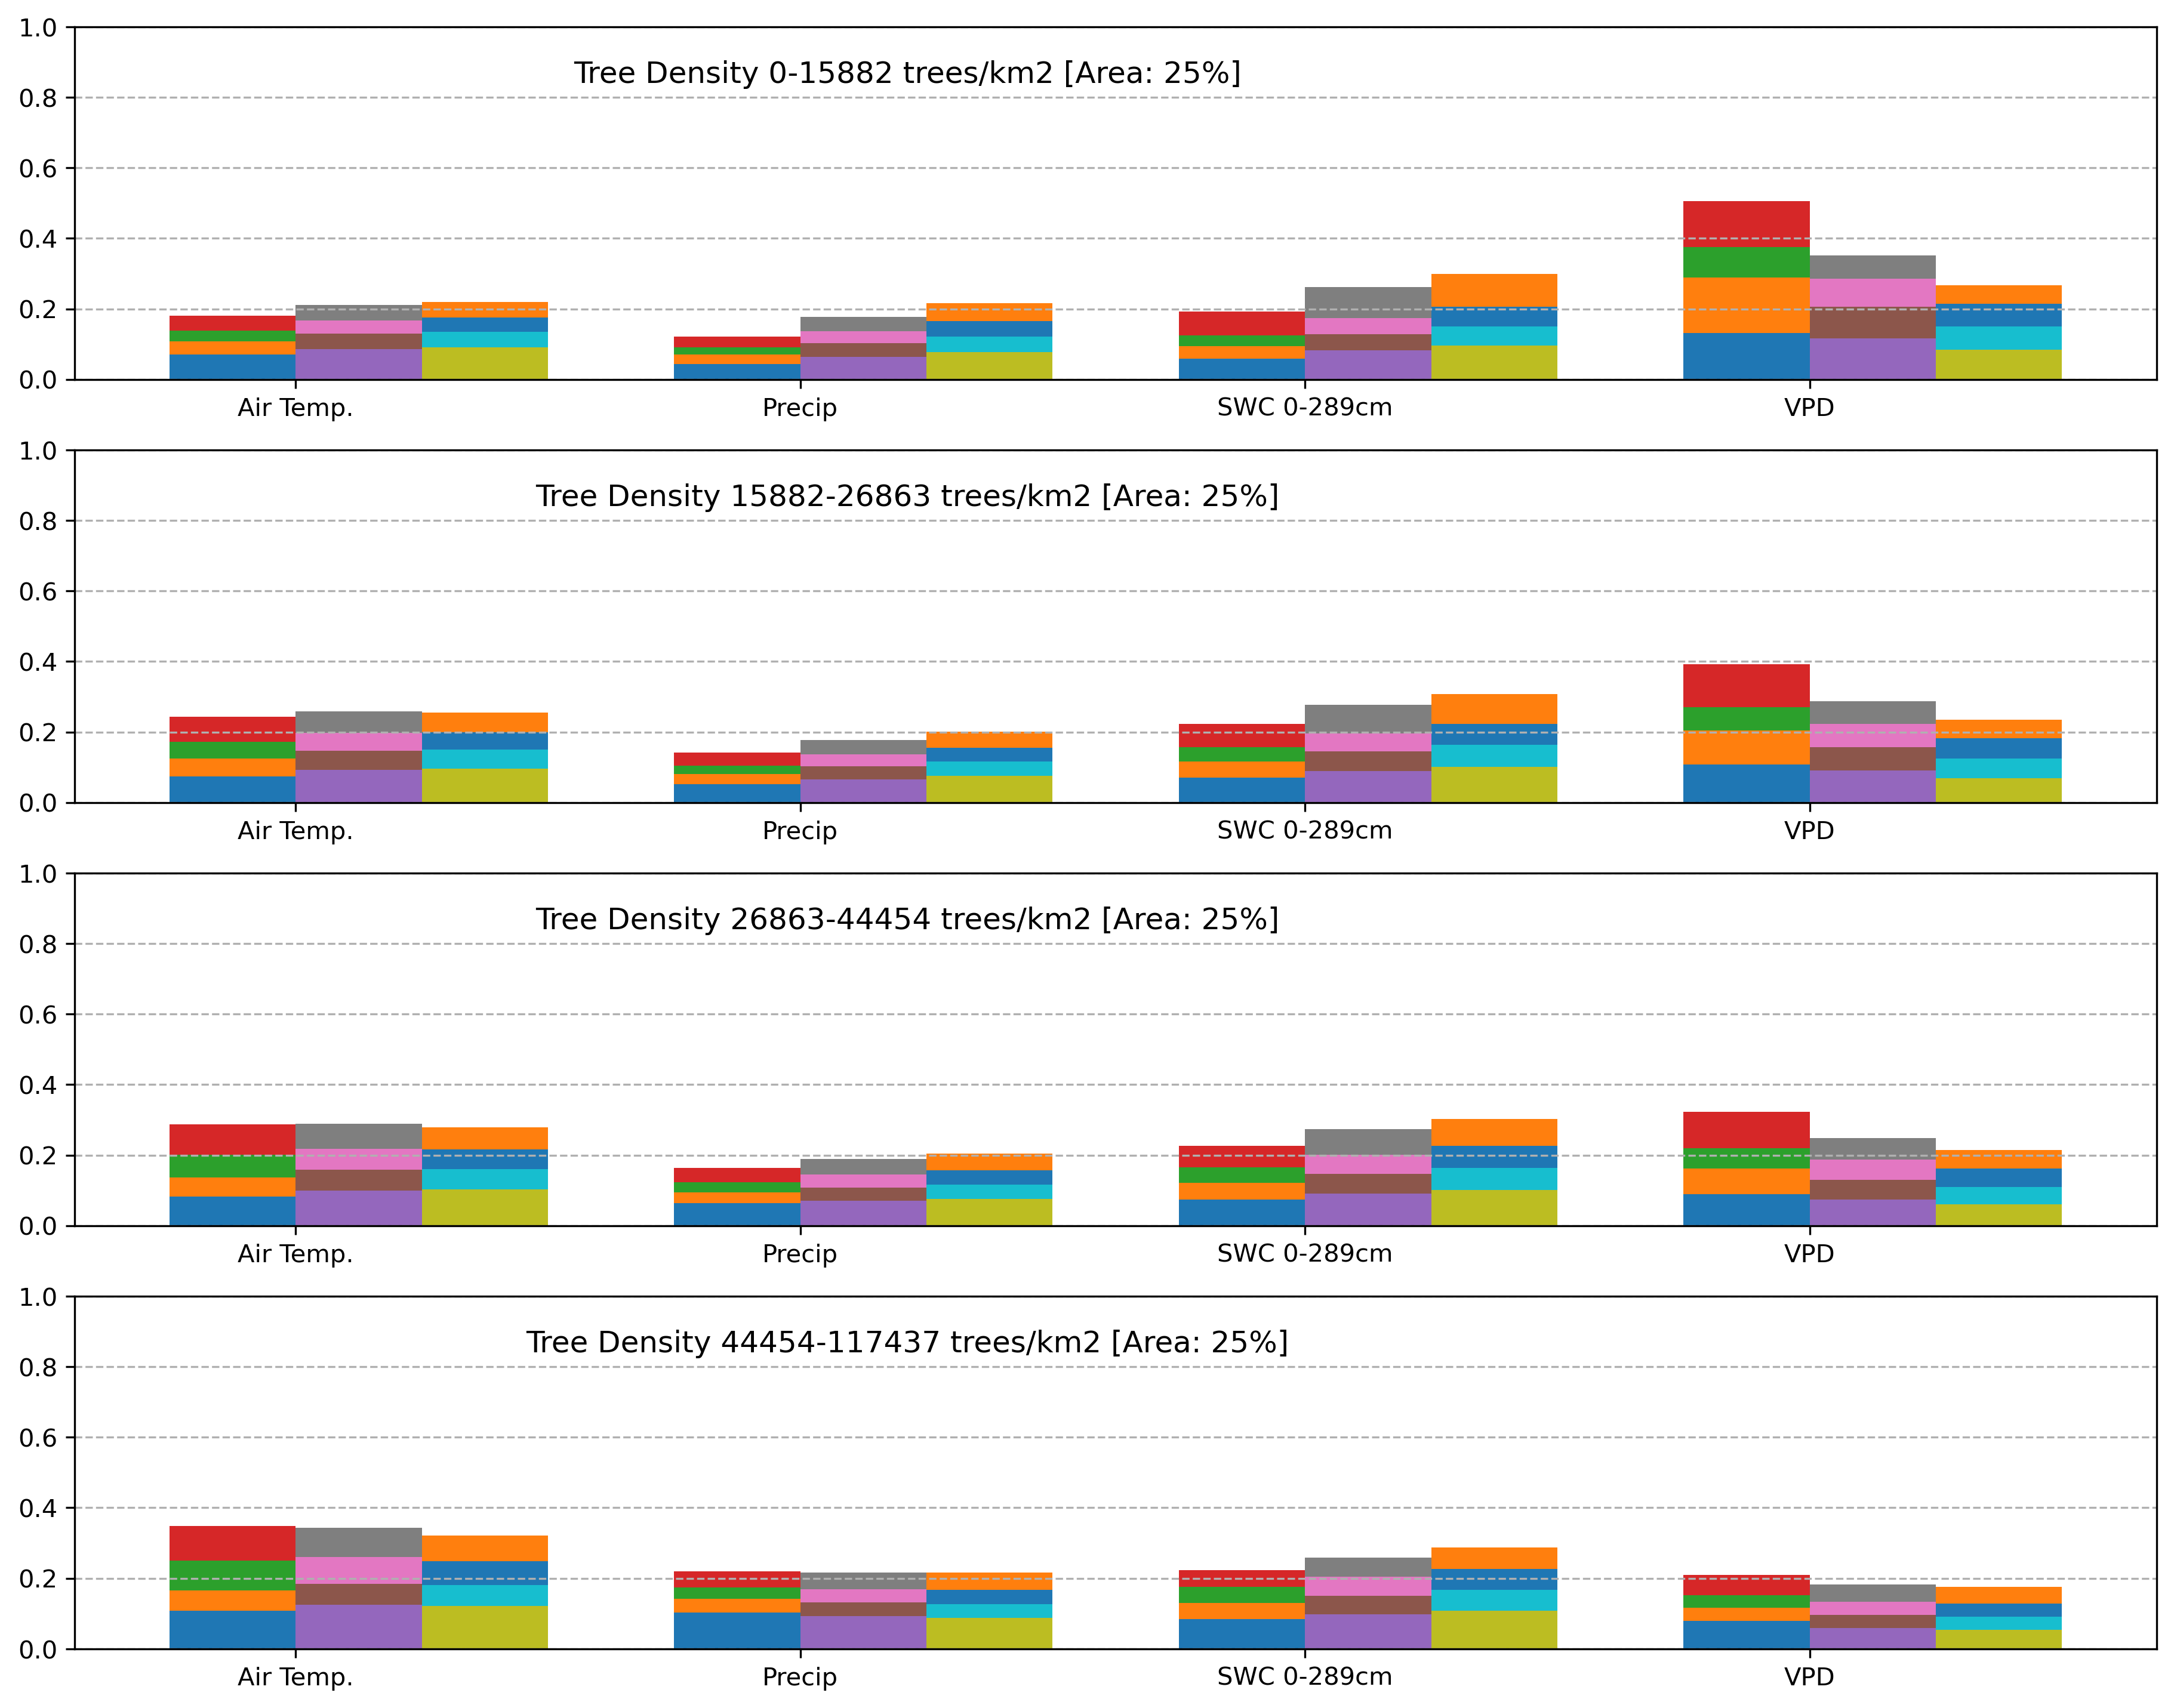

In [35]:
plot_dominant_three_by_treeden(cr_stats)
#cr_stats.treeden.max() #quantile(q=0.75)

In [33]:
print(cr_stats[(cr_stats.treeden >= cr_stats.treeden.min() ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.25))].shape[0]*100.0/cr_stats.shape[0])
print(cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.25) ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.50))].shape[0]*100.0/cr_stats.shape[0])
print(cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.50) ) & (cr_stats.treeden < cr_stats.treeden.quantile(q=0.75))].shape[0]*100.0/cr_stats.shape[0])
print(cr_stats[(cr_stats.treeden >= cr_stats.treeden.quantile(q=0.75) ) & (cr_stats.treeden < cr_stats.treeden.max())].shape[0]*100.0/cr_stats.shape[0])

24.993310804512905
25.006128370719455
25.00008733485623
24.997011184416667
